# **\[Essays\]** ggplot3

신록예찬  
2099-01-01

# intro

`ggplot2` 공부하다가 포기함

그냥 ggplot2를 랩핑하여 내 스타일에 맞는 코드를 새로 만듬 (가칭
`ggplot3`)

In [1]:
source('ggplot3.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


소스코드 다운로드:
<https://github.com/miruetoto/yechan3/blob/main/posts/1_Essays/ggplot3.R>

-   계속 업데이트할 예정

# `figsize`

> 주피터 환경에서 그림의 크기를 조정하는 함수로 `figsize()` 구현,
> Rstudio에서는 그림크기가 유연하게 조정가능하므로 필요없음.

`-` 기본플랏

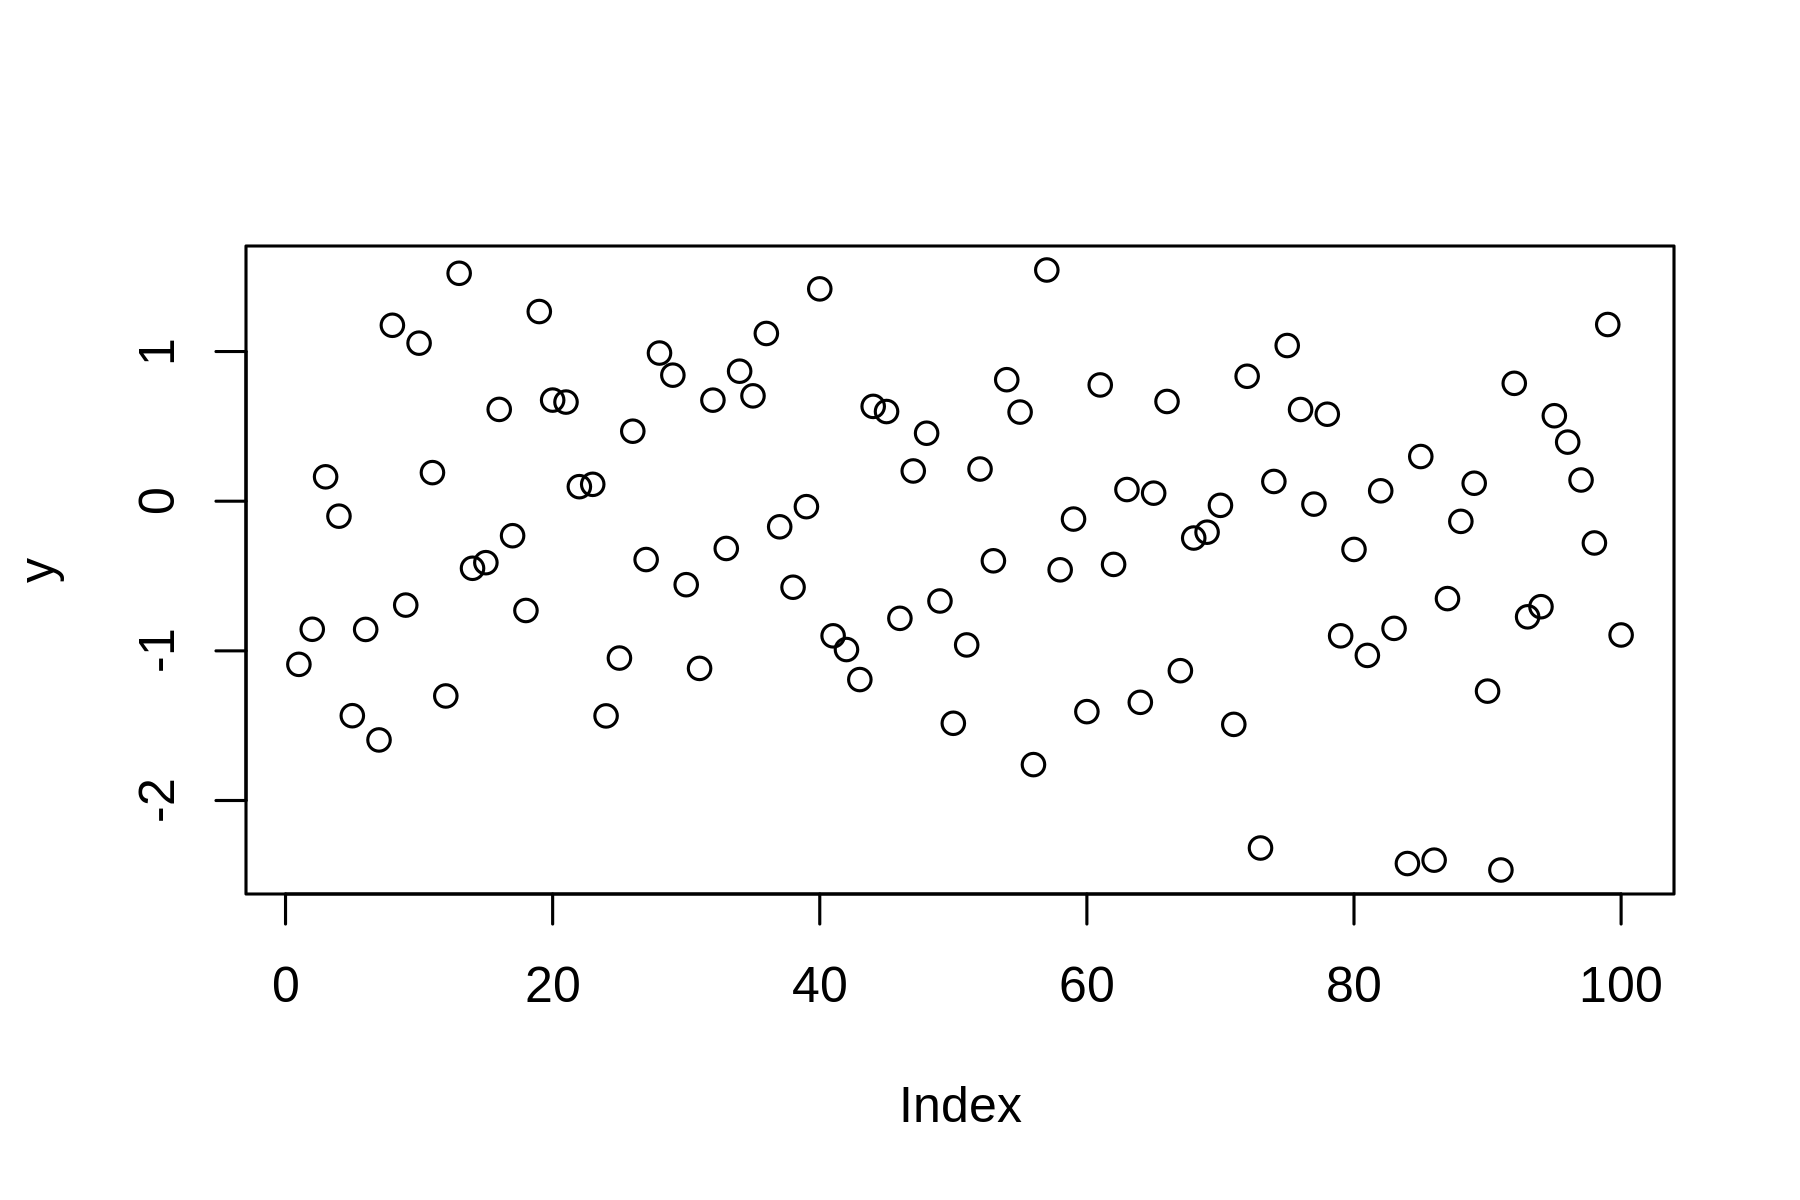

In [2]:
y = rnorm(100)
plot(y)

`-` 크기조정 (원래는 ggplot 이미지를 주피터에서 조정하려고 만들었는데,
기본플랏도 조정됨)

In [3]:
y = rnorm(100)
figsize(10,3) # 디폴트는 6,4
plot(y)
figsize()

# 기본적인 사용법 소개

## `ggplot` + `line` + `point`

In [4]:
y = rnorm(100)

`-` 예시1

In [5]:
ggplot() + line(1:100, y, lty=2, col='gray60')

`-` 예시2

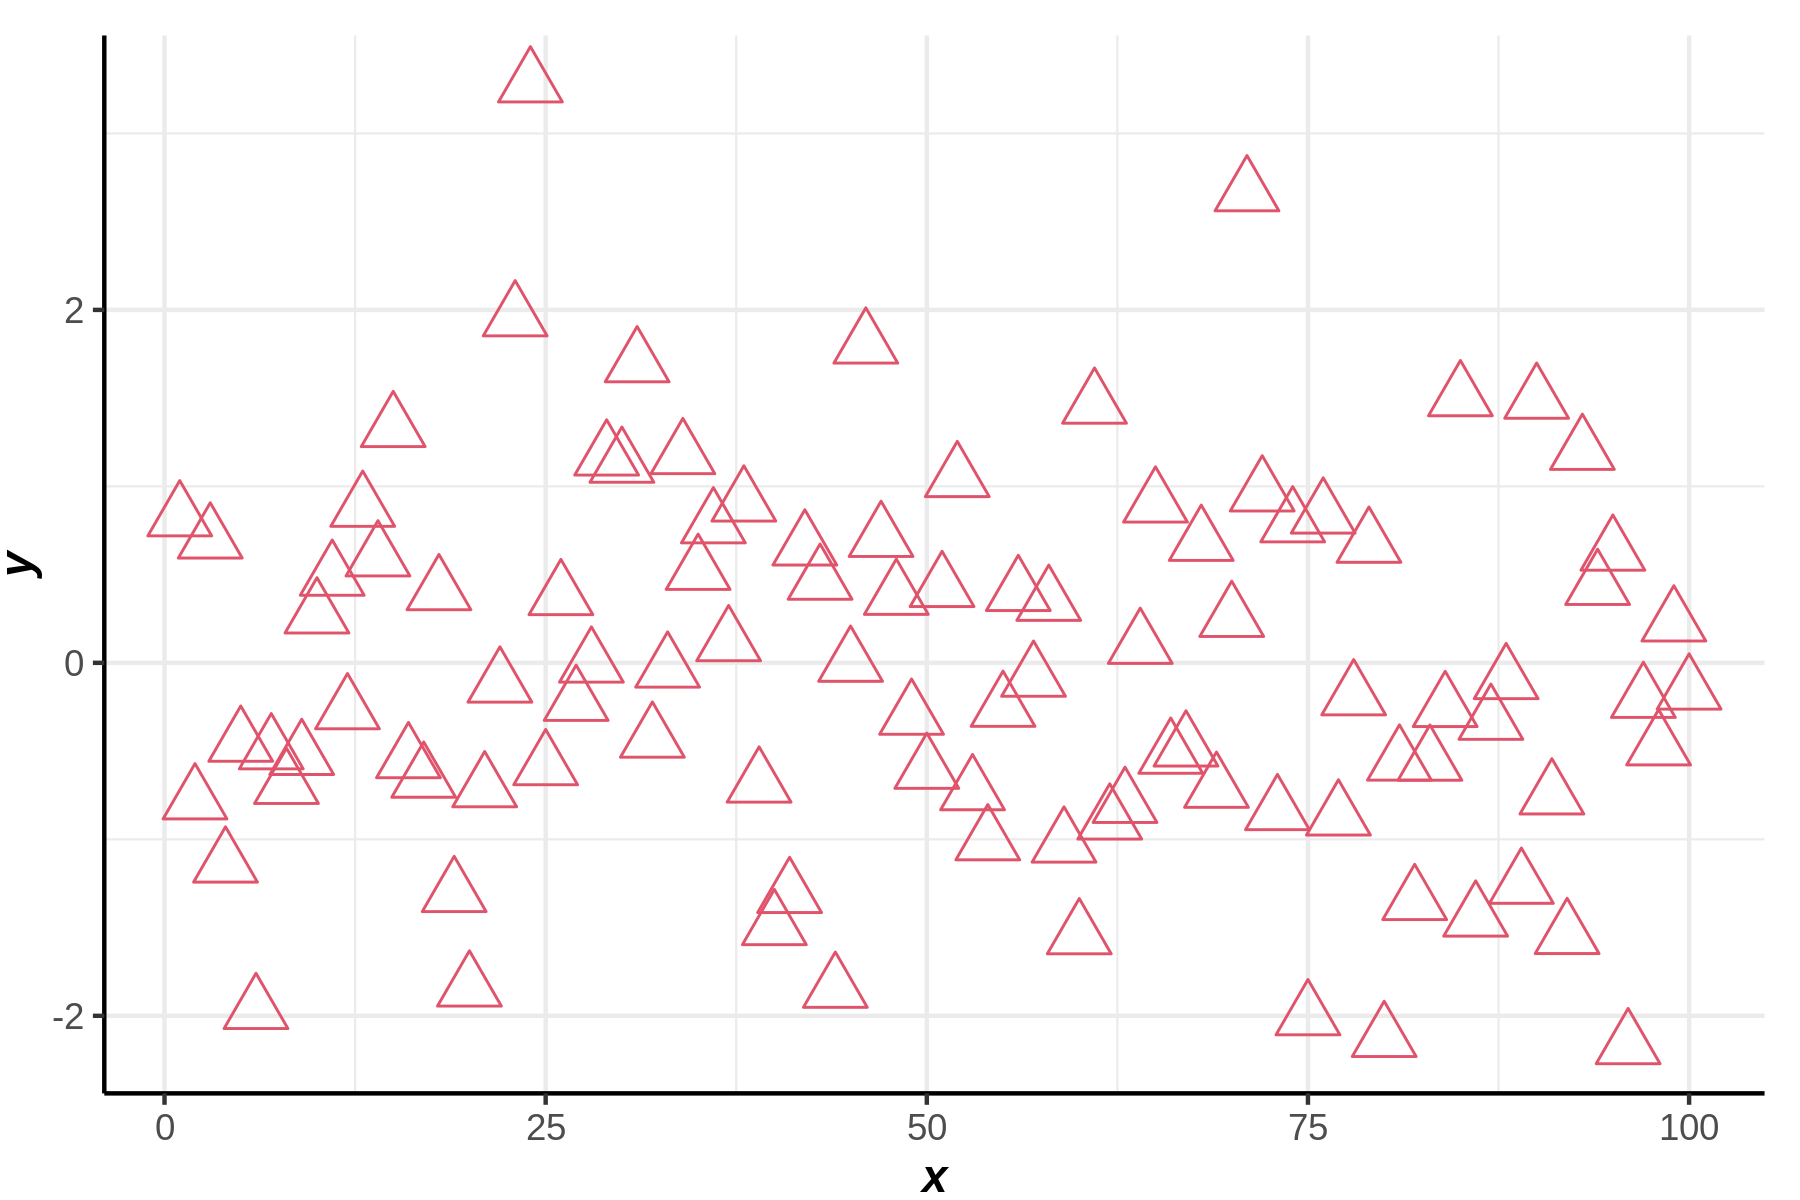

In [11]:
ggplot() + point(y,pch=2,col=2,cex=5)

`-` 예시3

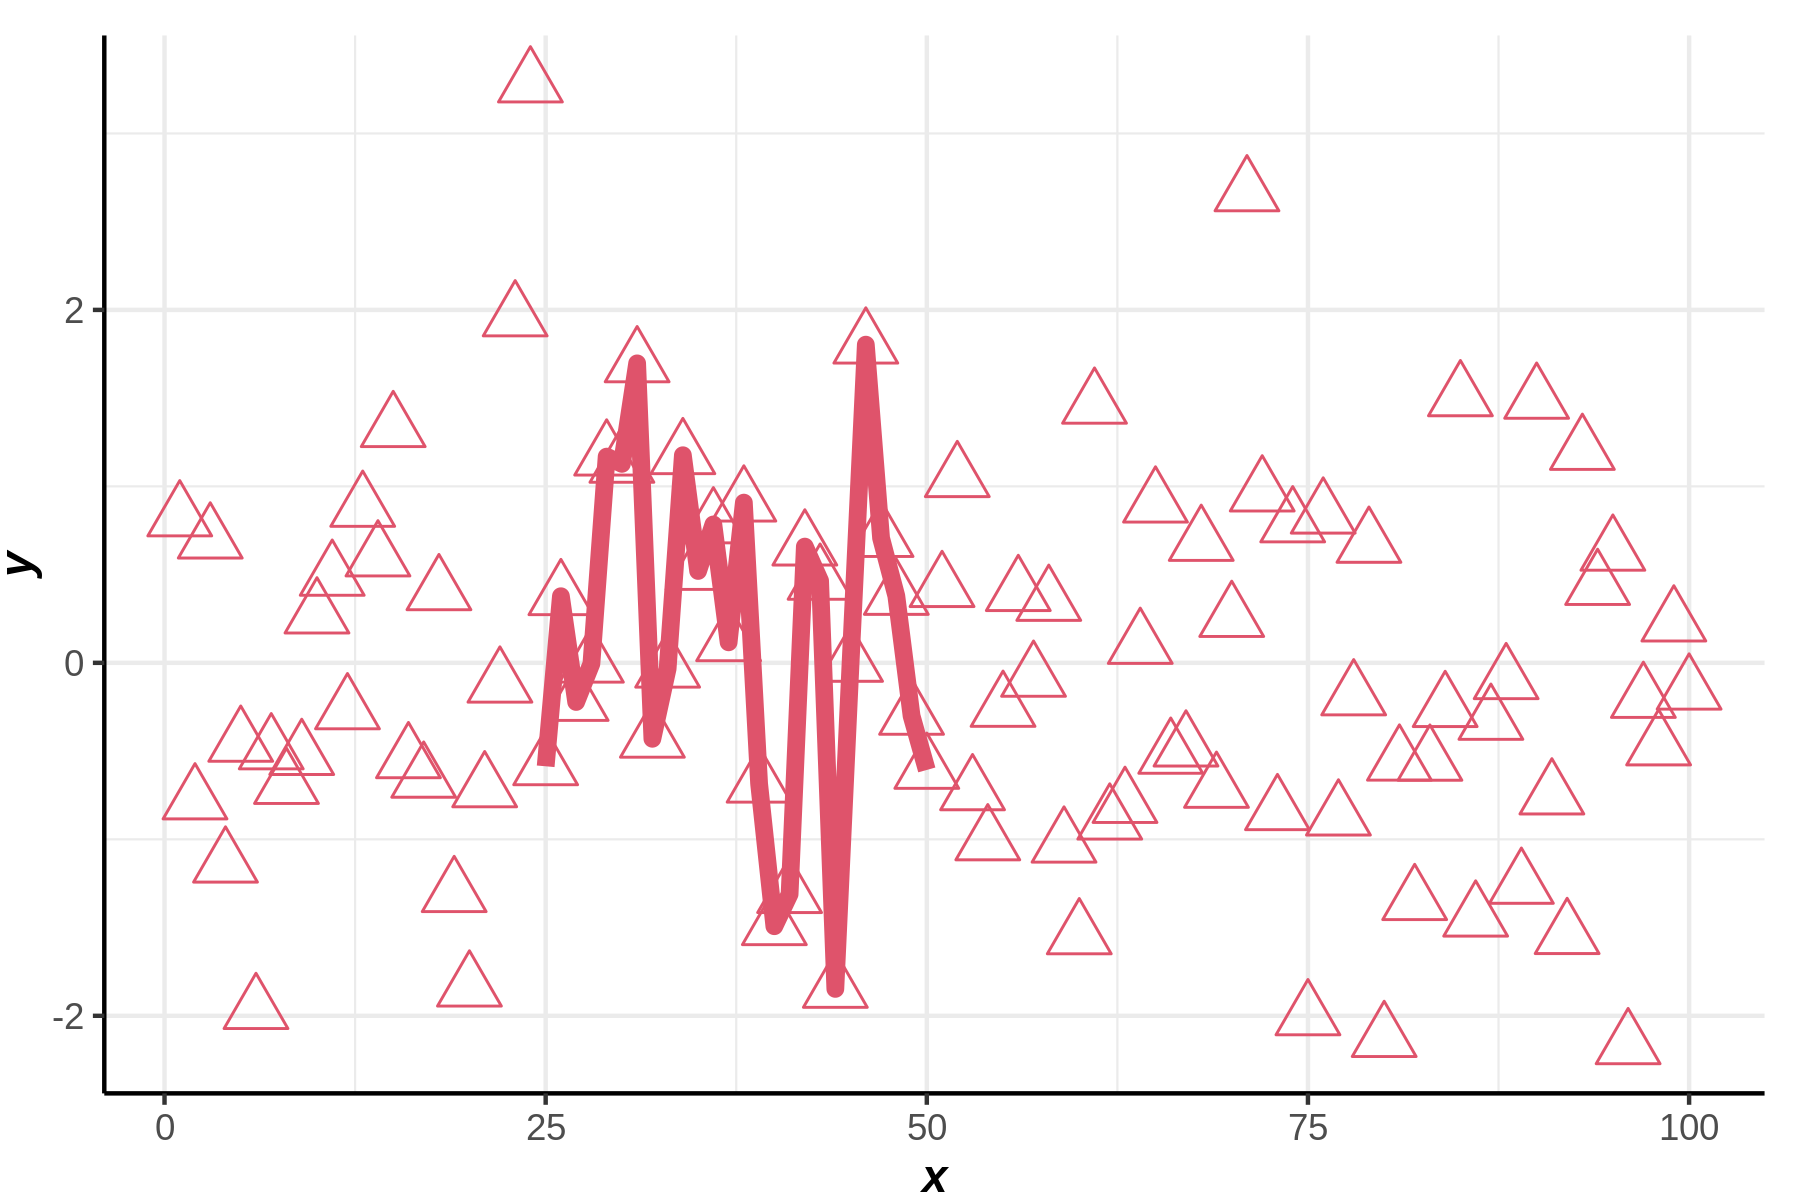

In [13]:
ggplot() + point(y,pch=2,col=2,cex=5) + line(25:50, y[25:50], col=2, lwd=2)

## `ggplot2`와 호환

In [14]:
df = data.frame(x=1:100,y=rnorm(100))
head(df)

x y         
1 1 -0.7047223
2 2 -0.9200618
3 3 -0.8146697
4 4 -0.6520046
5 5 -2.3586632
6 6 -1.1957997

In [16]:
ggplot(data=df) + 
geom_point(aes(x=x,y=y)) + 
line(1:50,df$y[1:50],col=2,lty=2)

> 완벽하게 호환가능

## subplotting

In [17]:
y = rnorm(100)
p1 = ggplot() + line(y,lty=2,col='gray60')
p2 = ggplot() + point(y,pch=2,col=2,cex=5)
p3 = ggplot() + point(y,pch=2,col=2,cex=5) + line(25:50, y[25:50], col=2, lwd=2)
p4 = ggplot() + point(y) + line(1:50,y[1:50],col='orange')

`-` 예시1: 좌우로 나란히

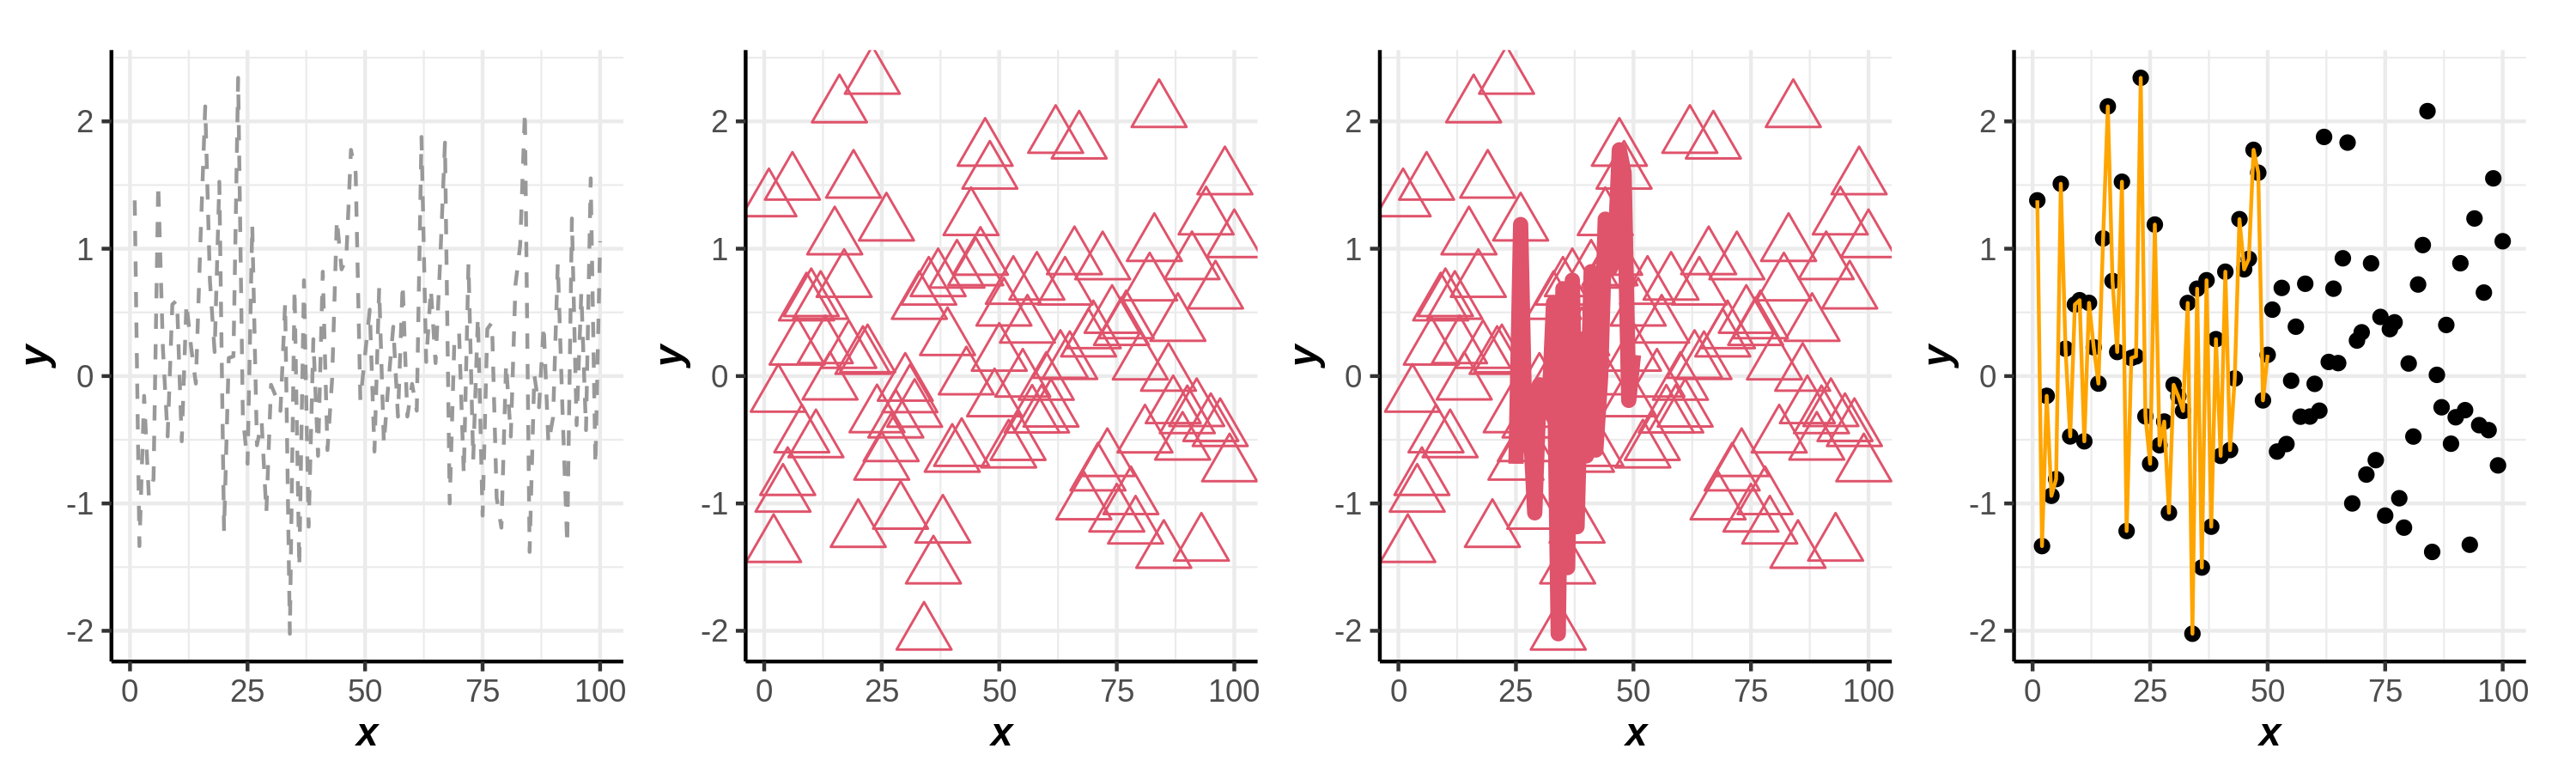

In [20]:
figsize(10,3)
p1|p2|p3|p4
figsize()

`-` 예시2: 위아래로

In [21]:
figsize(10,5)
p1/p2/p3/p4
figsize()

`-` 예시3: 그리드로!

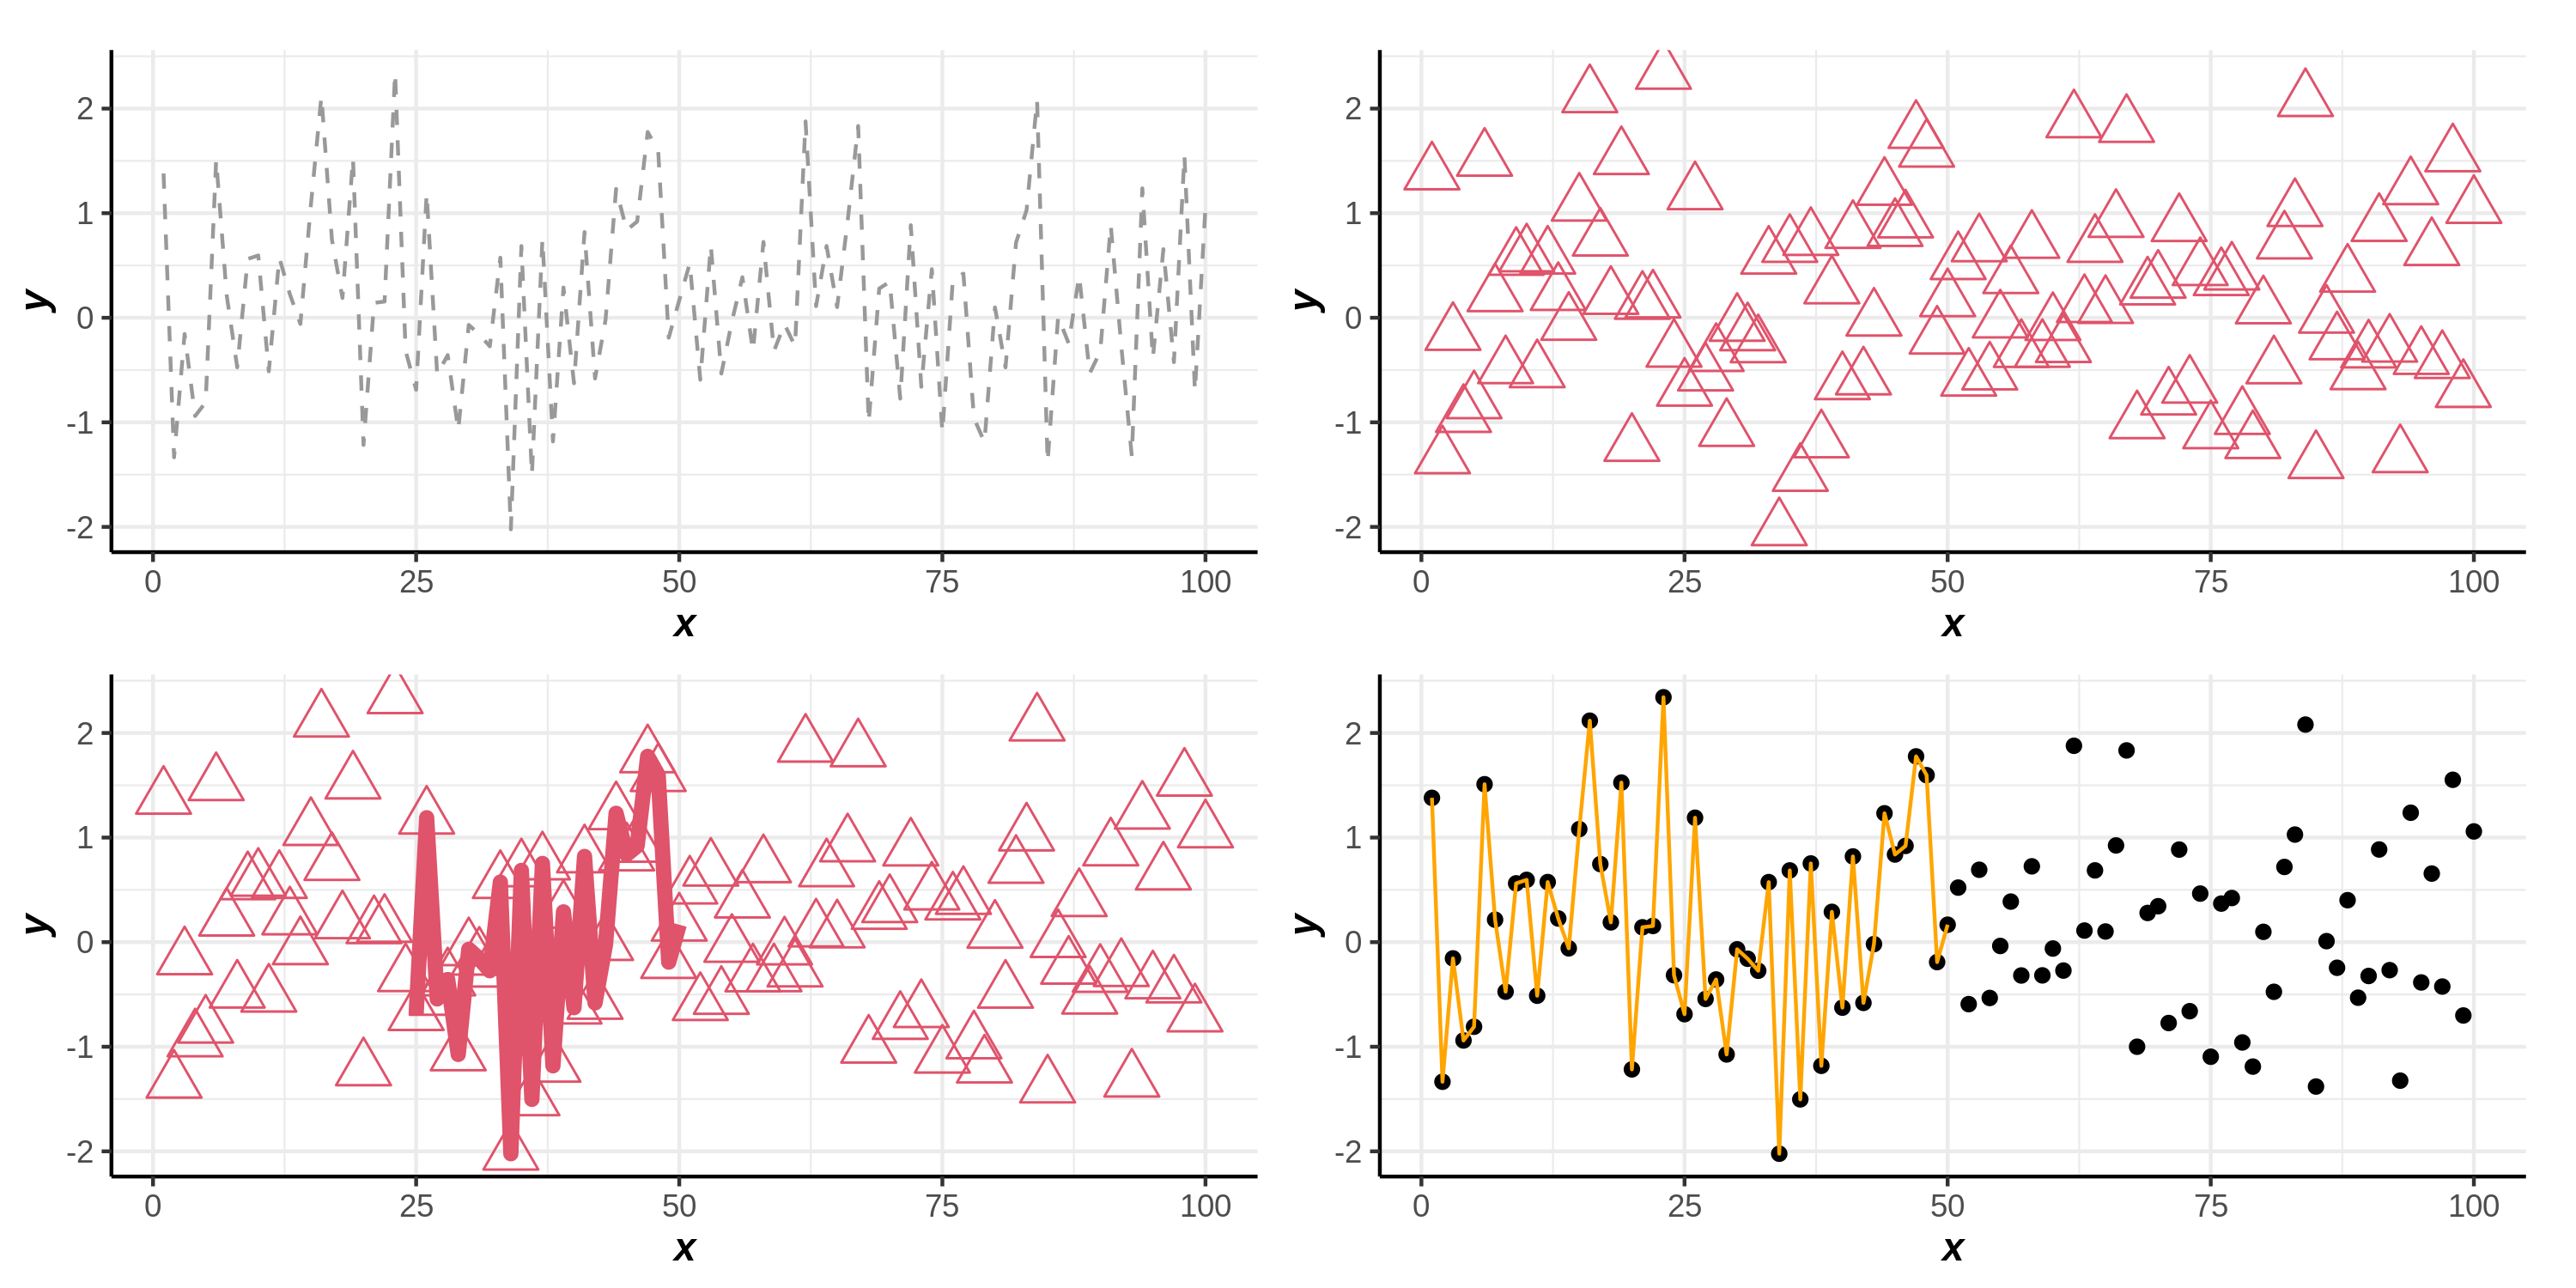

In [22]:
figsize(10,5)
(p1|p2)/(p3|p4)
figsize()

`-` 예시4: 좀 더 난해한 모양으로 (1)

In [23]:
figsize(10,5)
(p1|p2|p3)/p4
figsize()

`-` 예시5: 좀 더 난해한 모양으로 (2)

In [24]:
figsize(10,5)
(p1|p2|p3)/(p4|p1)
figsize()

`-` 예시6: 좀 더 난해한 모양으로 (3)

In [25]:
figsize(10,5)
p1|(p2/p3/p4)
figsize()

## `ggtitle`

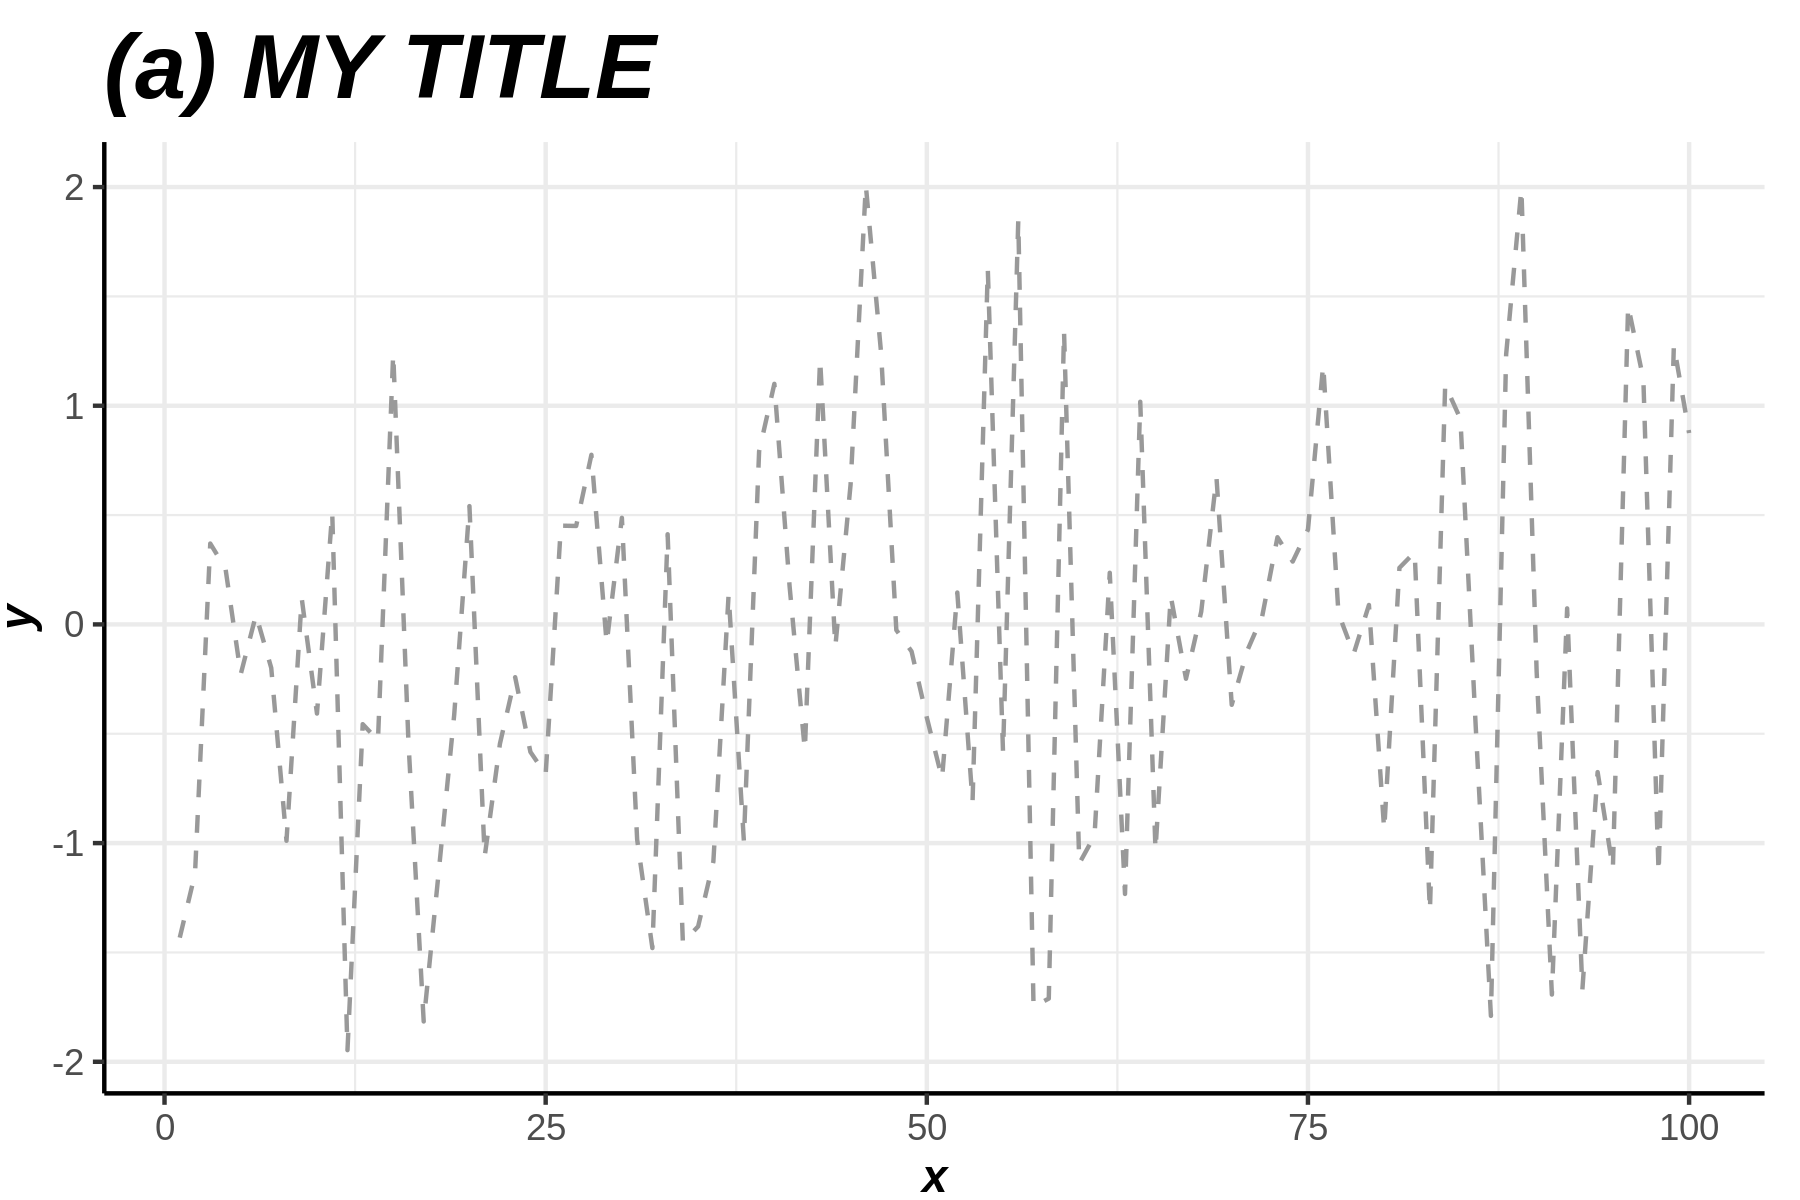

In [26]:
y = rnorm(100)
ggplot() + line(y,lty=2,col='gray60') + 
ggtitle("(a) MY TITLE")

## `xlab`, `ylab`

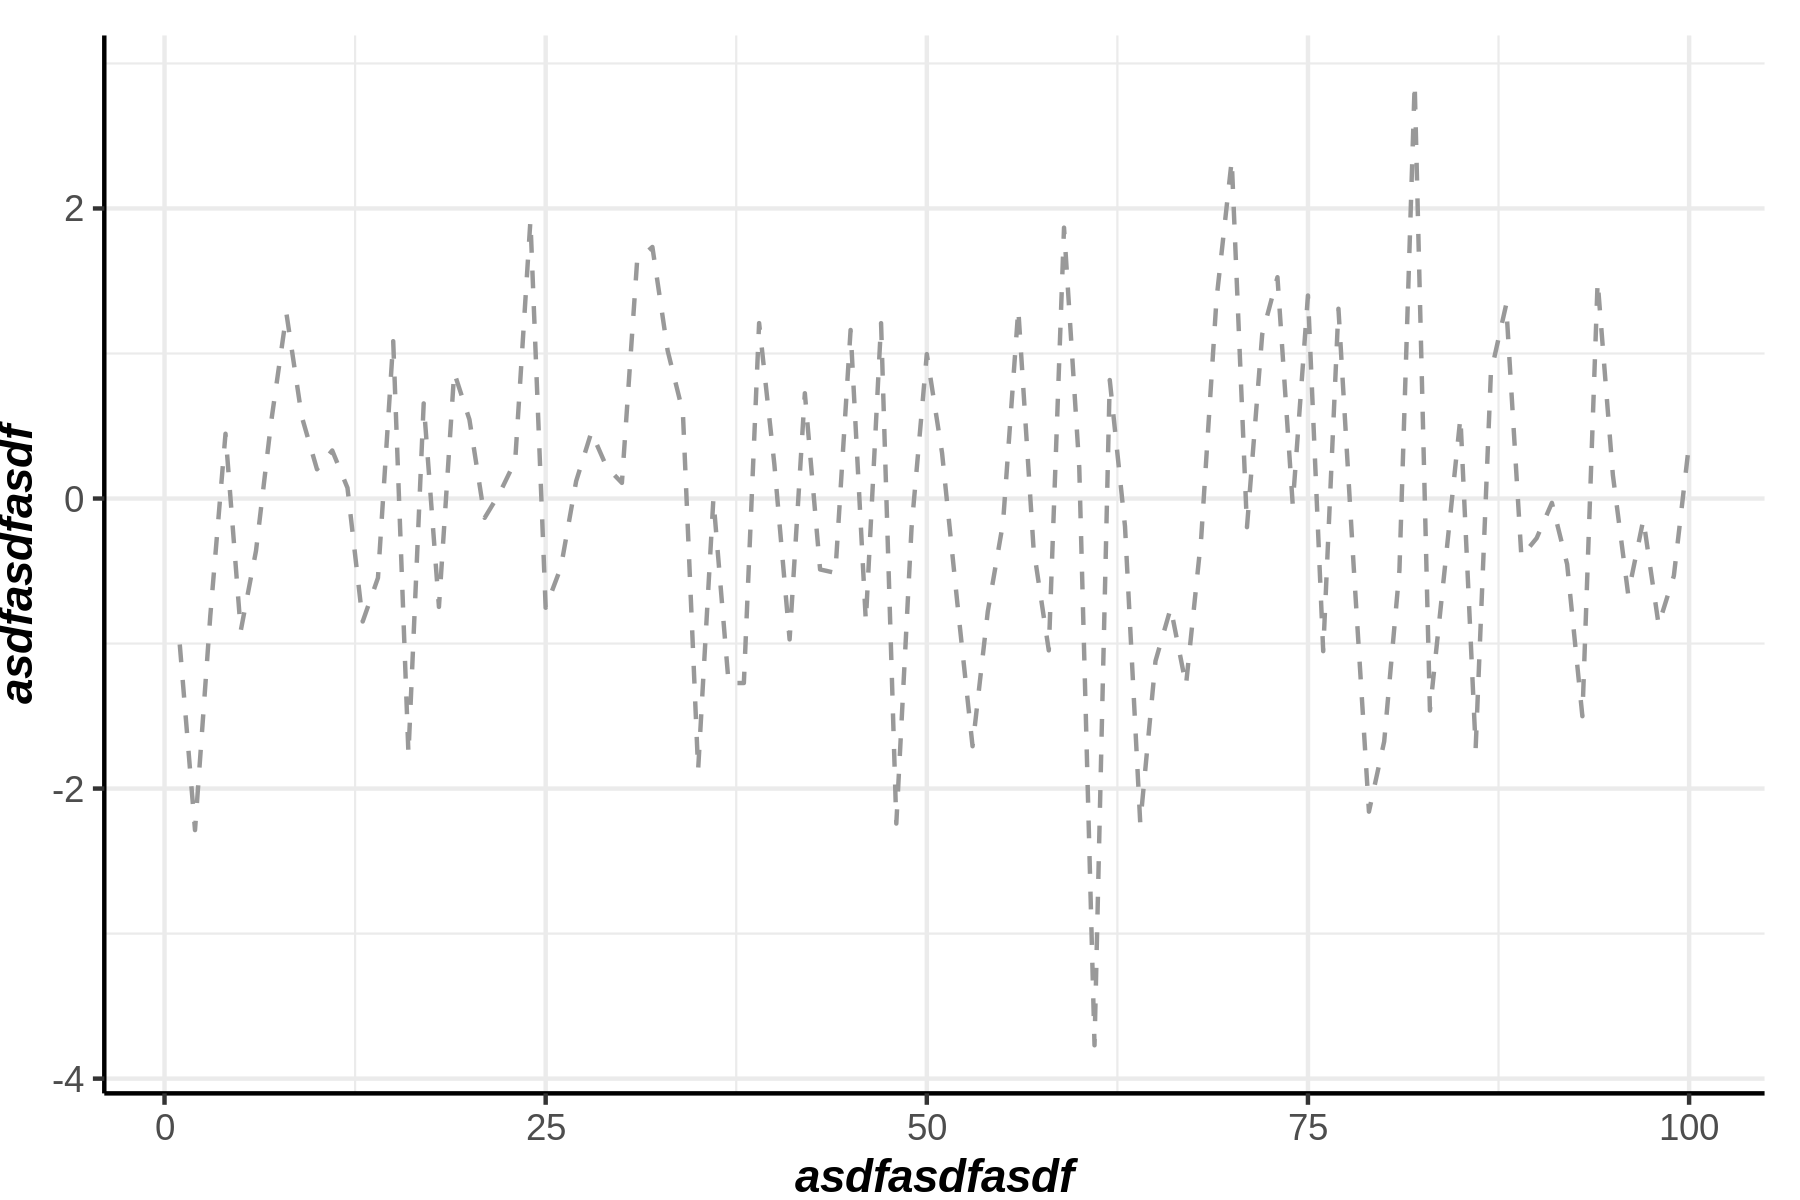

In [27]:
y = rnorm(100)
ggplot() + line(y,lty=2,col='gray60') + 
xlab("asdfasdfasdf") + ylab("asdfasdfasdf")

## legends

In [28]:
y1 = rnorm(10)
y2 = rnorm(10)

In [35]:
ggplot()+
line(y1,label="y1",lty=2)+point(y1,label="y1",cex=3)+
line(y2,label="y2",lty=2)+point(y2,label="y2",cex=3)

## wide_y

`-` 예시1

In [36]:
y1 = rnorm(10)
y2 = rnorm(10)

In [41]:
figsize(6,4)
ggplot()+line(cbind(y1,y2),lty=2)+point(cbind(y1,y2),cex=3)
figsize()

`-` 예시2

In [42]:
x = 11:15
y1 = rnorm(5)
y2 = rnorm(5)

In [43]:
figsize(6,4)
ggplot()+line(x,cbind(y1,y2),lty=2)+point(x,cbind(y1,y2),cex=3)
figsize()

# 2D geoms

## smooth

In [44]:
x = 1:100/100
y1 = 2*x + rnorm(100)*0.3
y2 = -3*x + rnorm(100)*0.3 +3

`-` 예시1

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


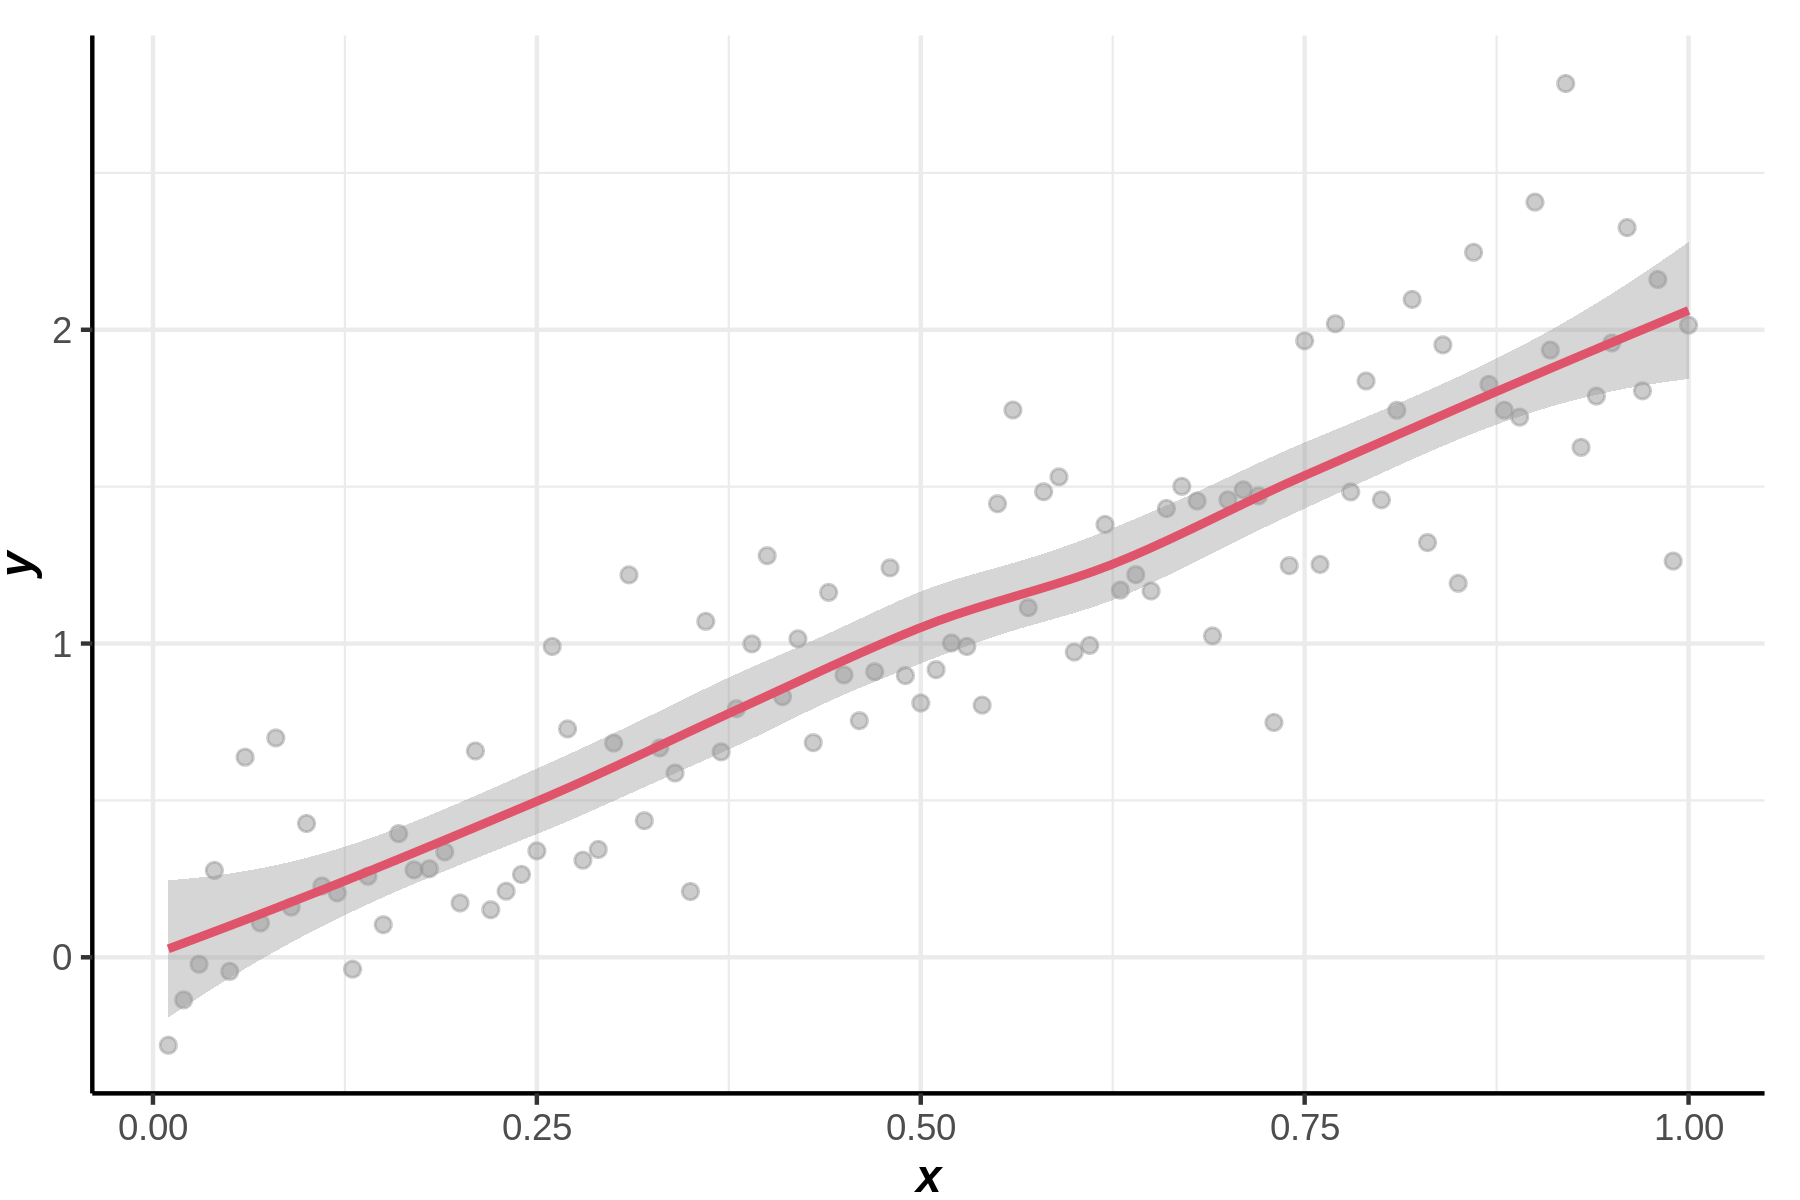

In [45]:
ggplot()+point(x,y1,alpha=0.5,col="gray60") + smooth(x,y1,col=2)

`-` 예시2

In [46]:
ggplot()+point(x,y1,alpha=0.5,col="gray60") +
smooth(x[1:60],y1[1:60],col=2) + 
smooth(x[40:100],y1[40:100],col=4) 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


`-` 예시3

In [47]:
ggplot()+point(x,cbind(y1,y2),alpha=0.5) +
smooth(x,cbind(y1,y2))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


## area

In [48]:
y1 = c(10,20,10,50)
y2 = c(15,20,5,30)

`-` 예시1

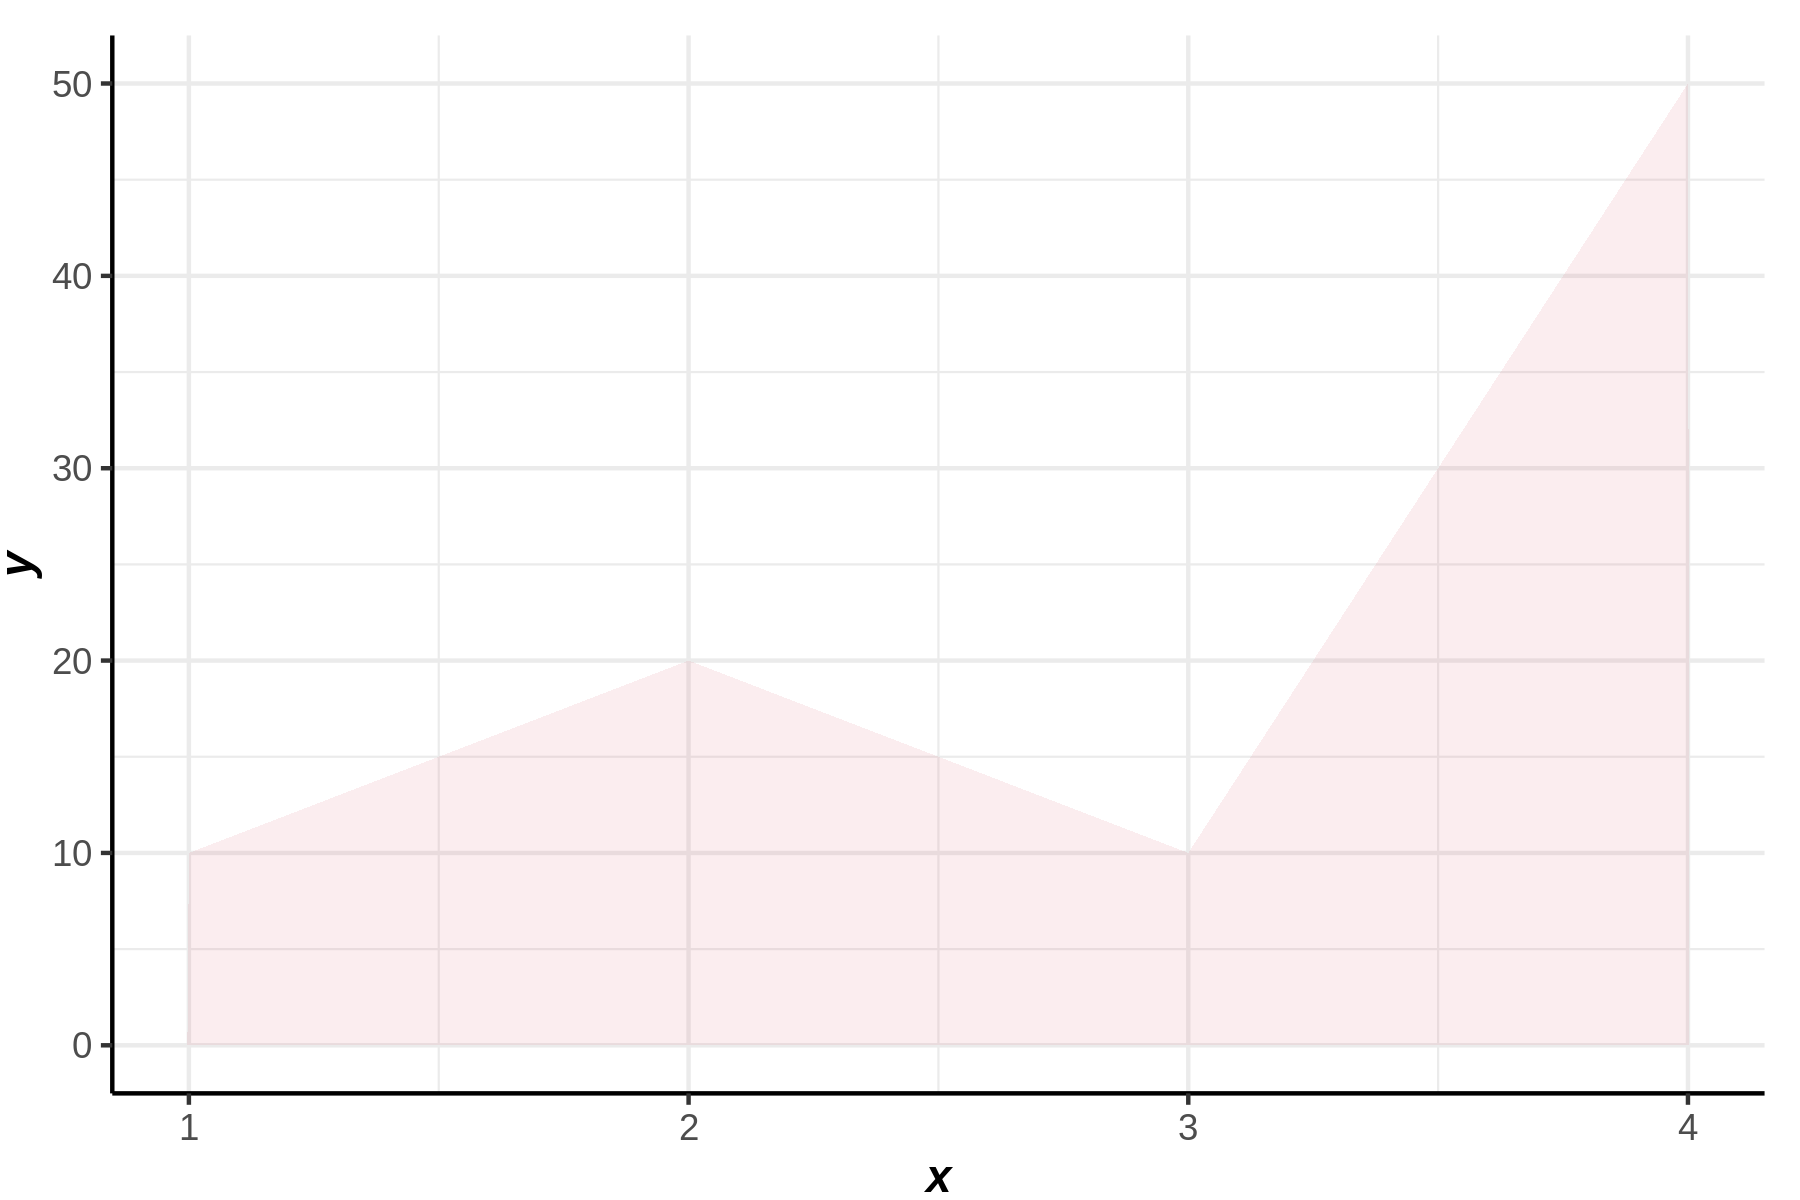

In [49]:
ggplot() + area(y1,fill=2)

`-` 예시2

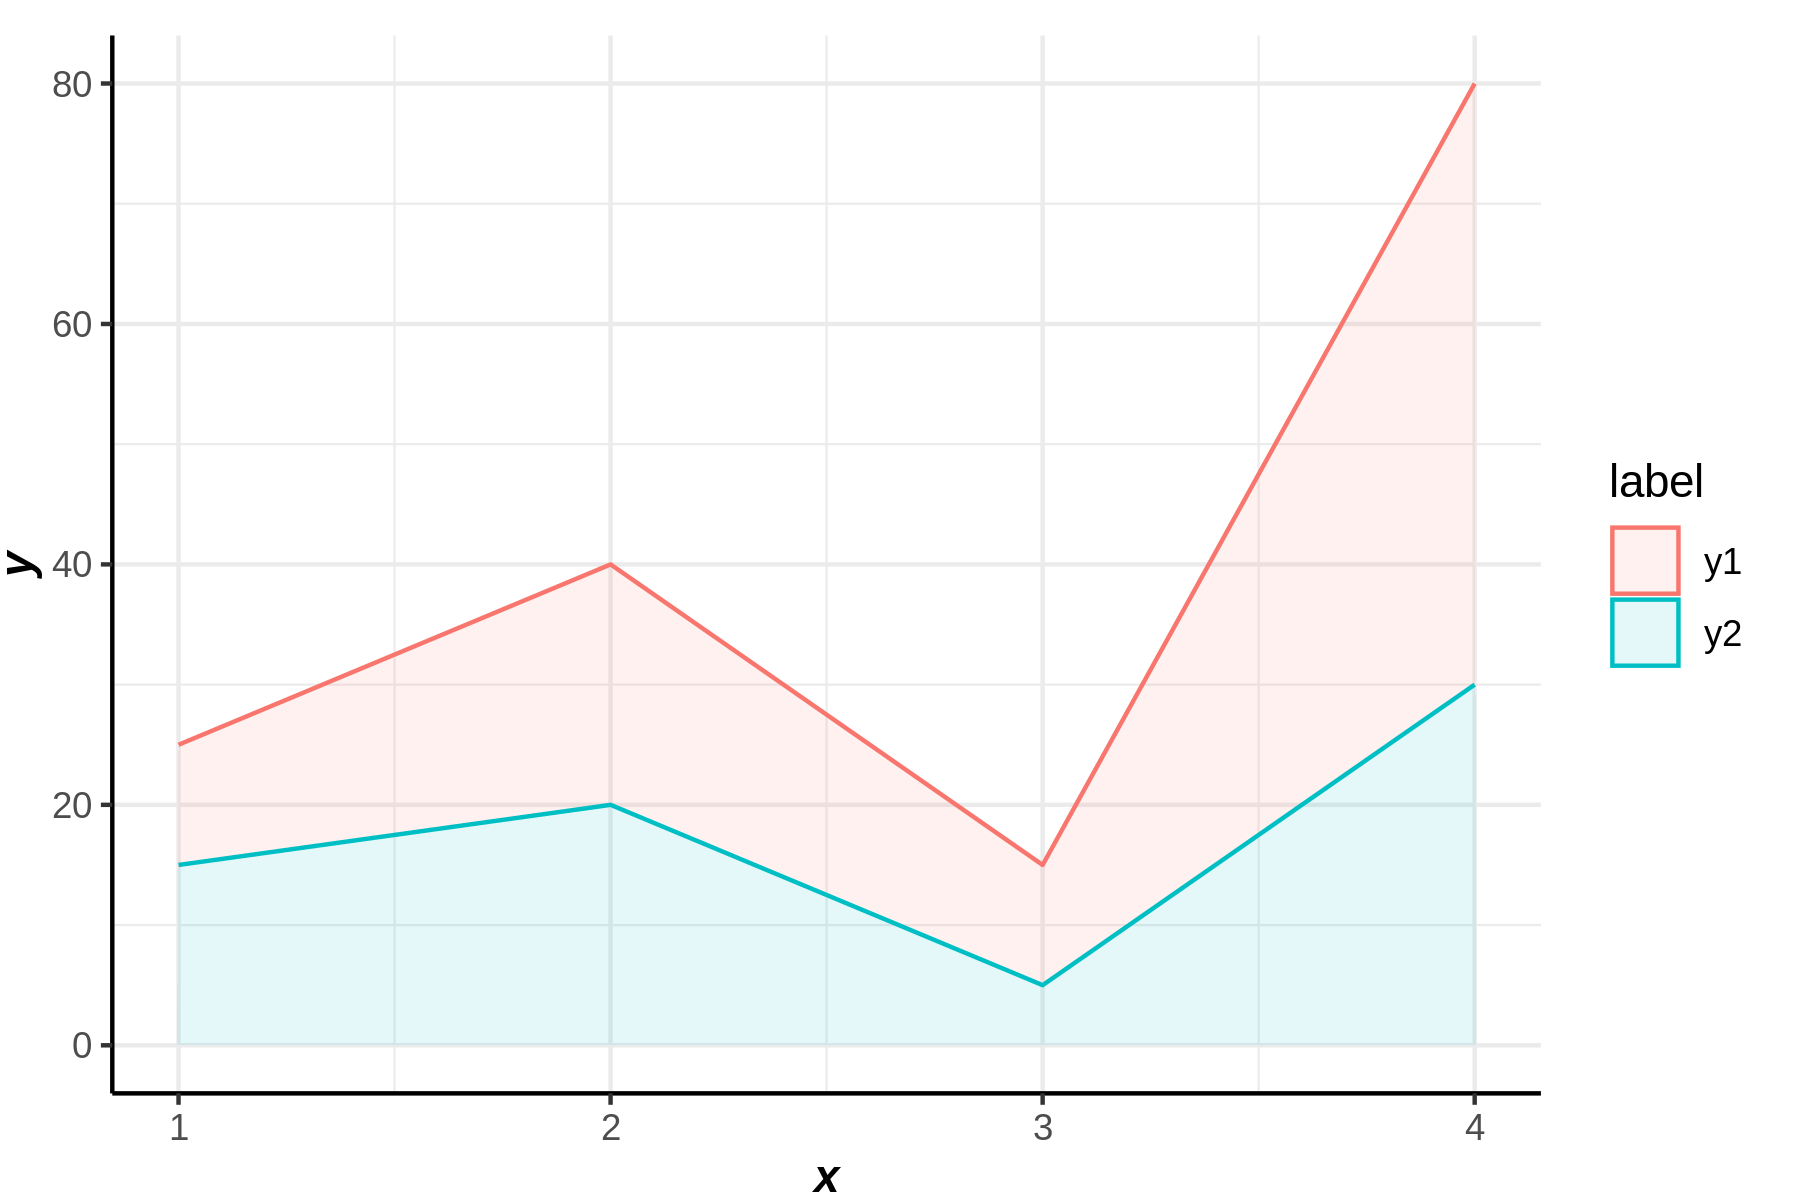

In [50]:
ggplot() + area(cbind(y1,y2))

## step

In [51]:
y1 = cumsum(rnorm(100))
y2 = cumsum(rnorm(100))

`-` 예시1

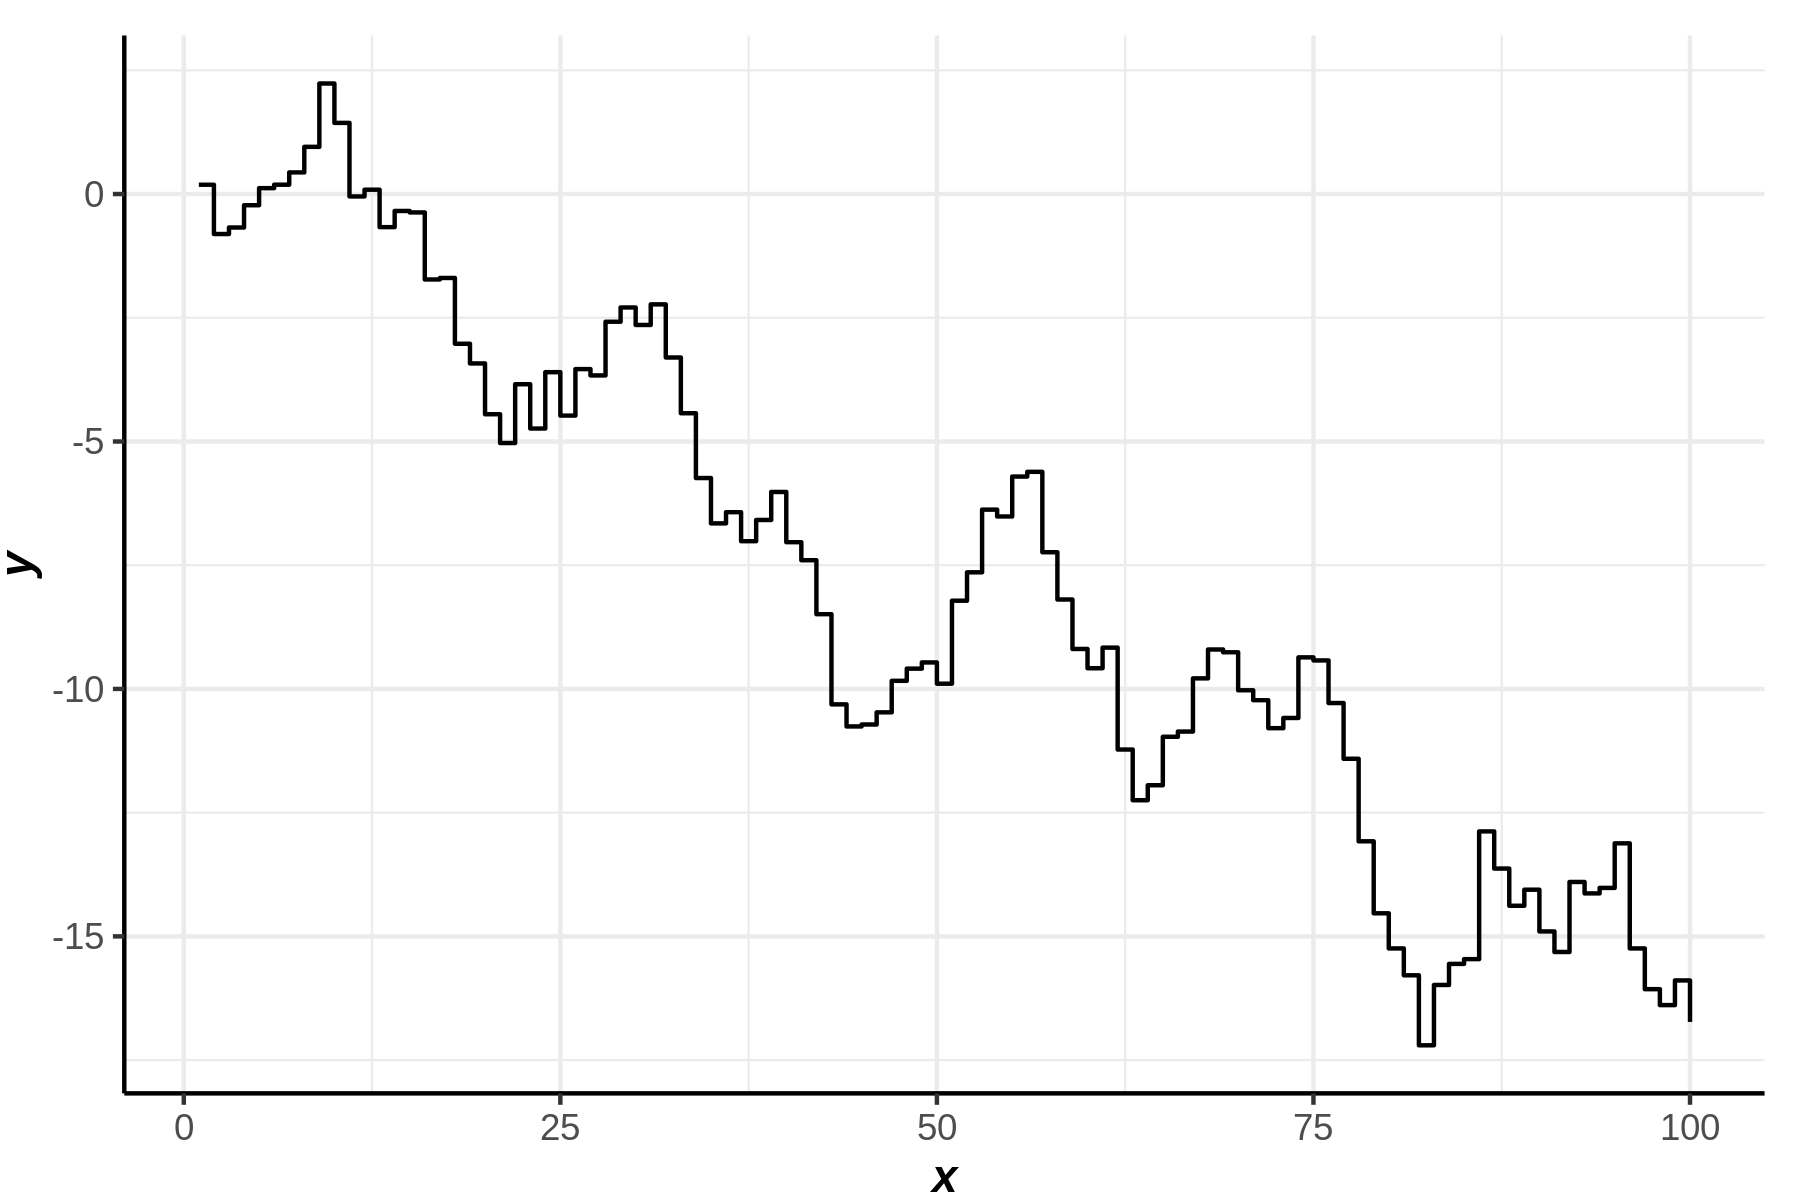

In [52]:
ggplot() + step(y1)

`-` 예시2

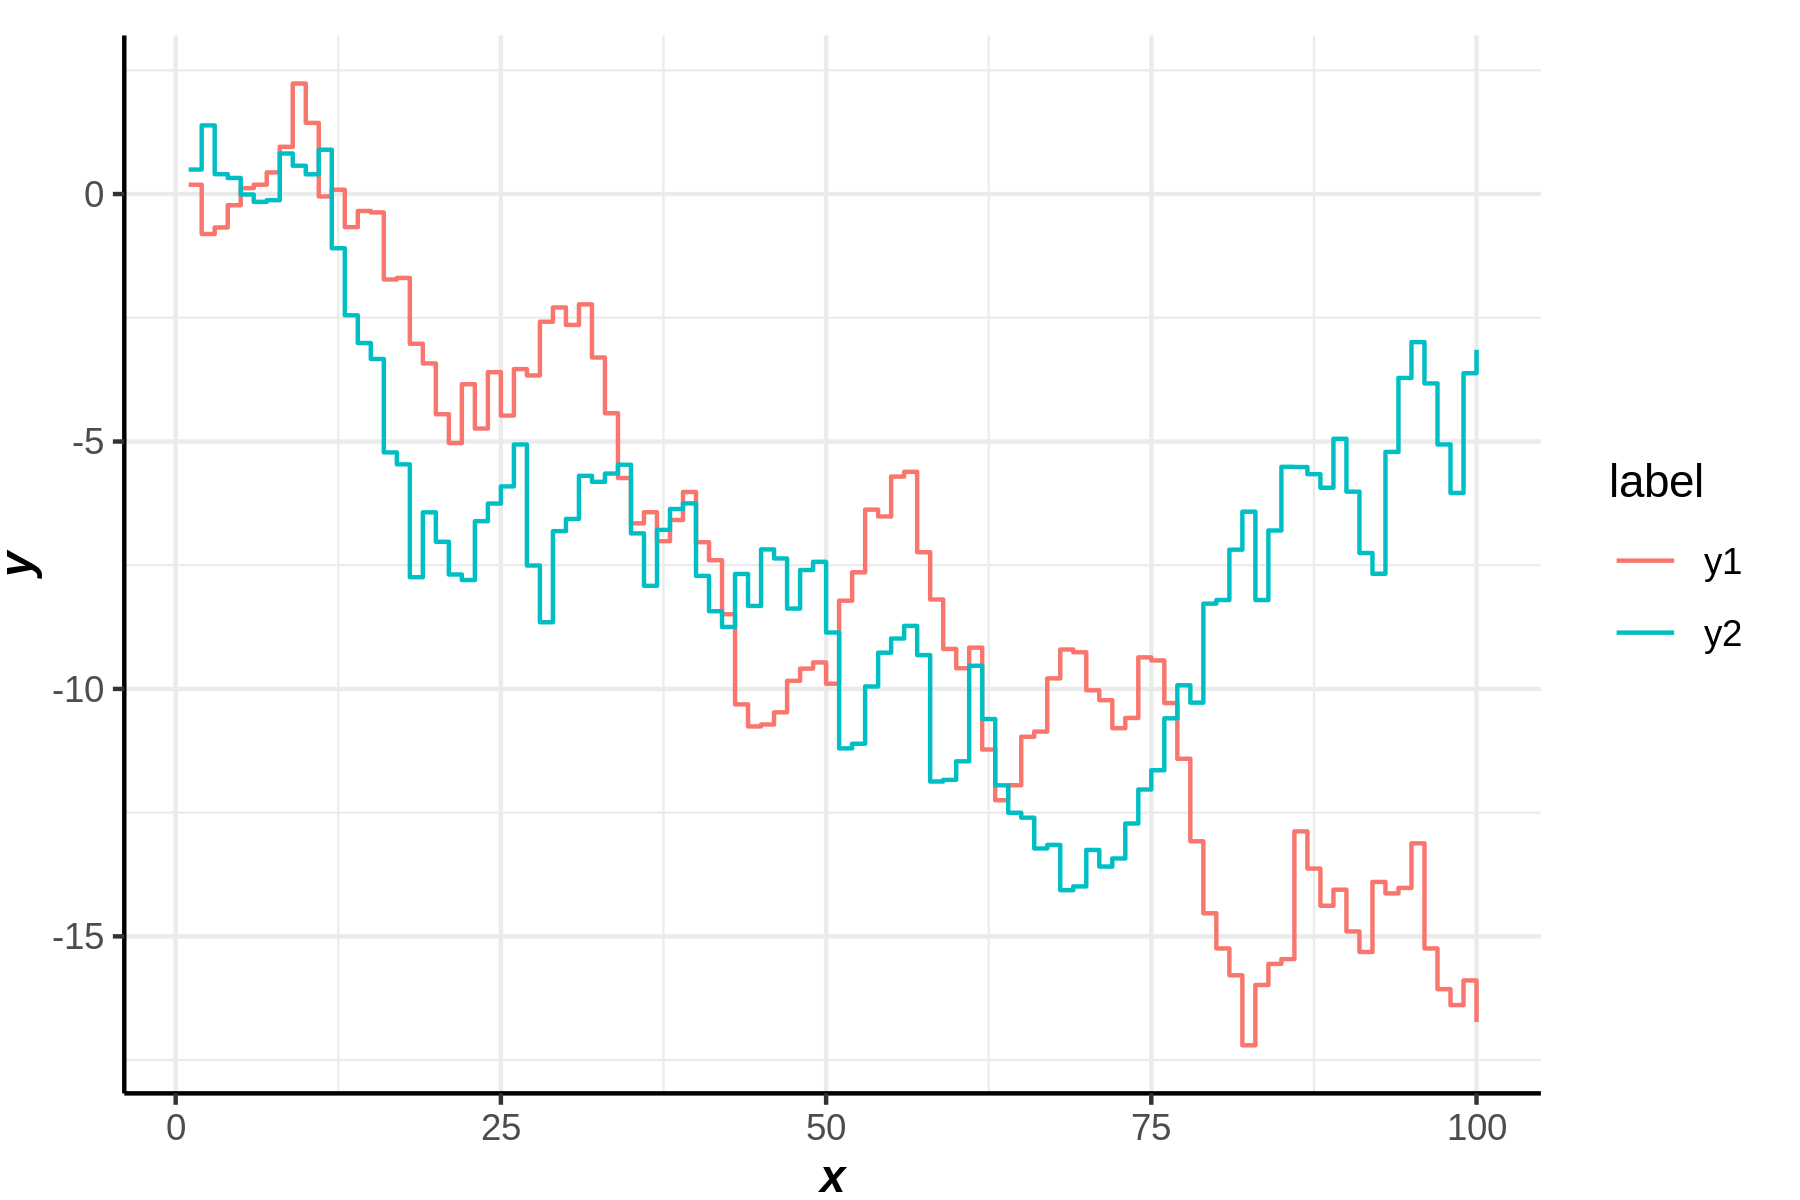

In [53]:
ggplot() + step(cbind(y1,y2))

## jitter

In [54]:
x = sample(c(20,30,40,50),size=100,replace = TRUE)
y = rnorm(100)

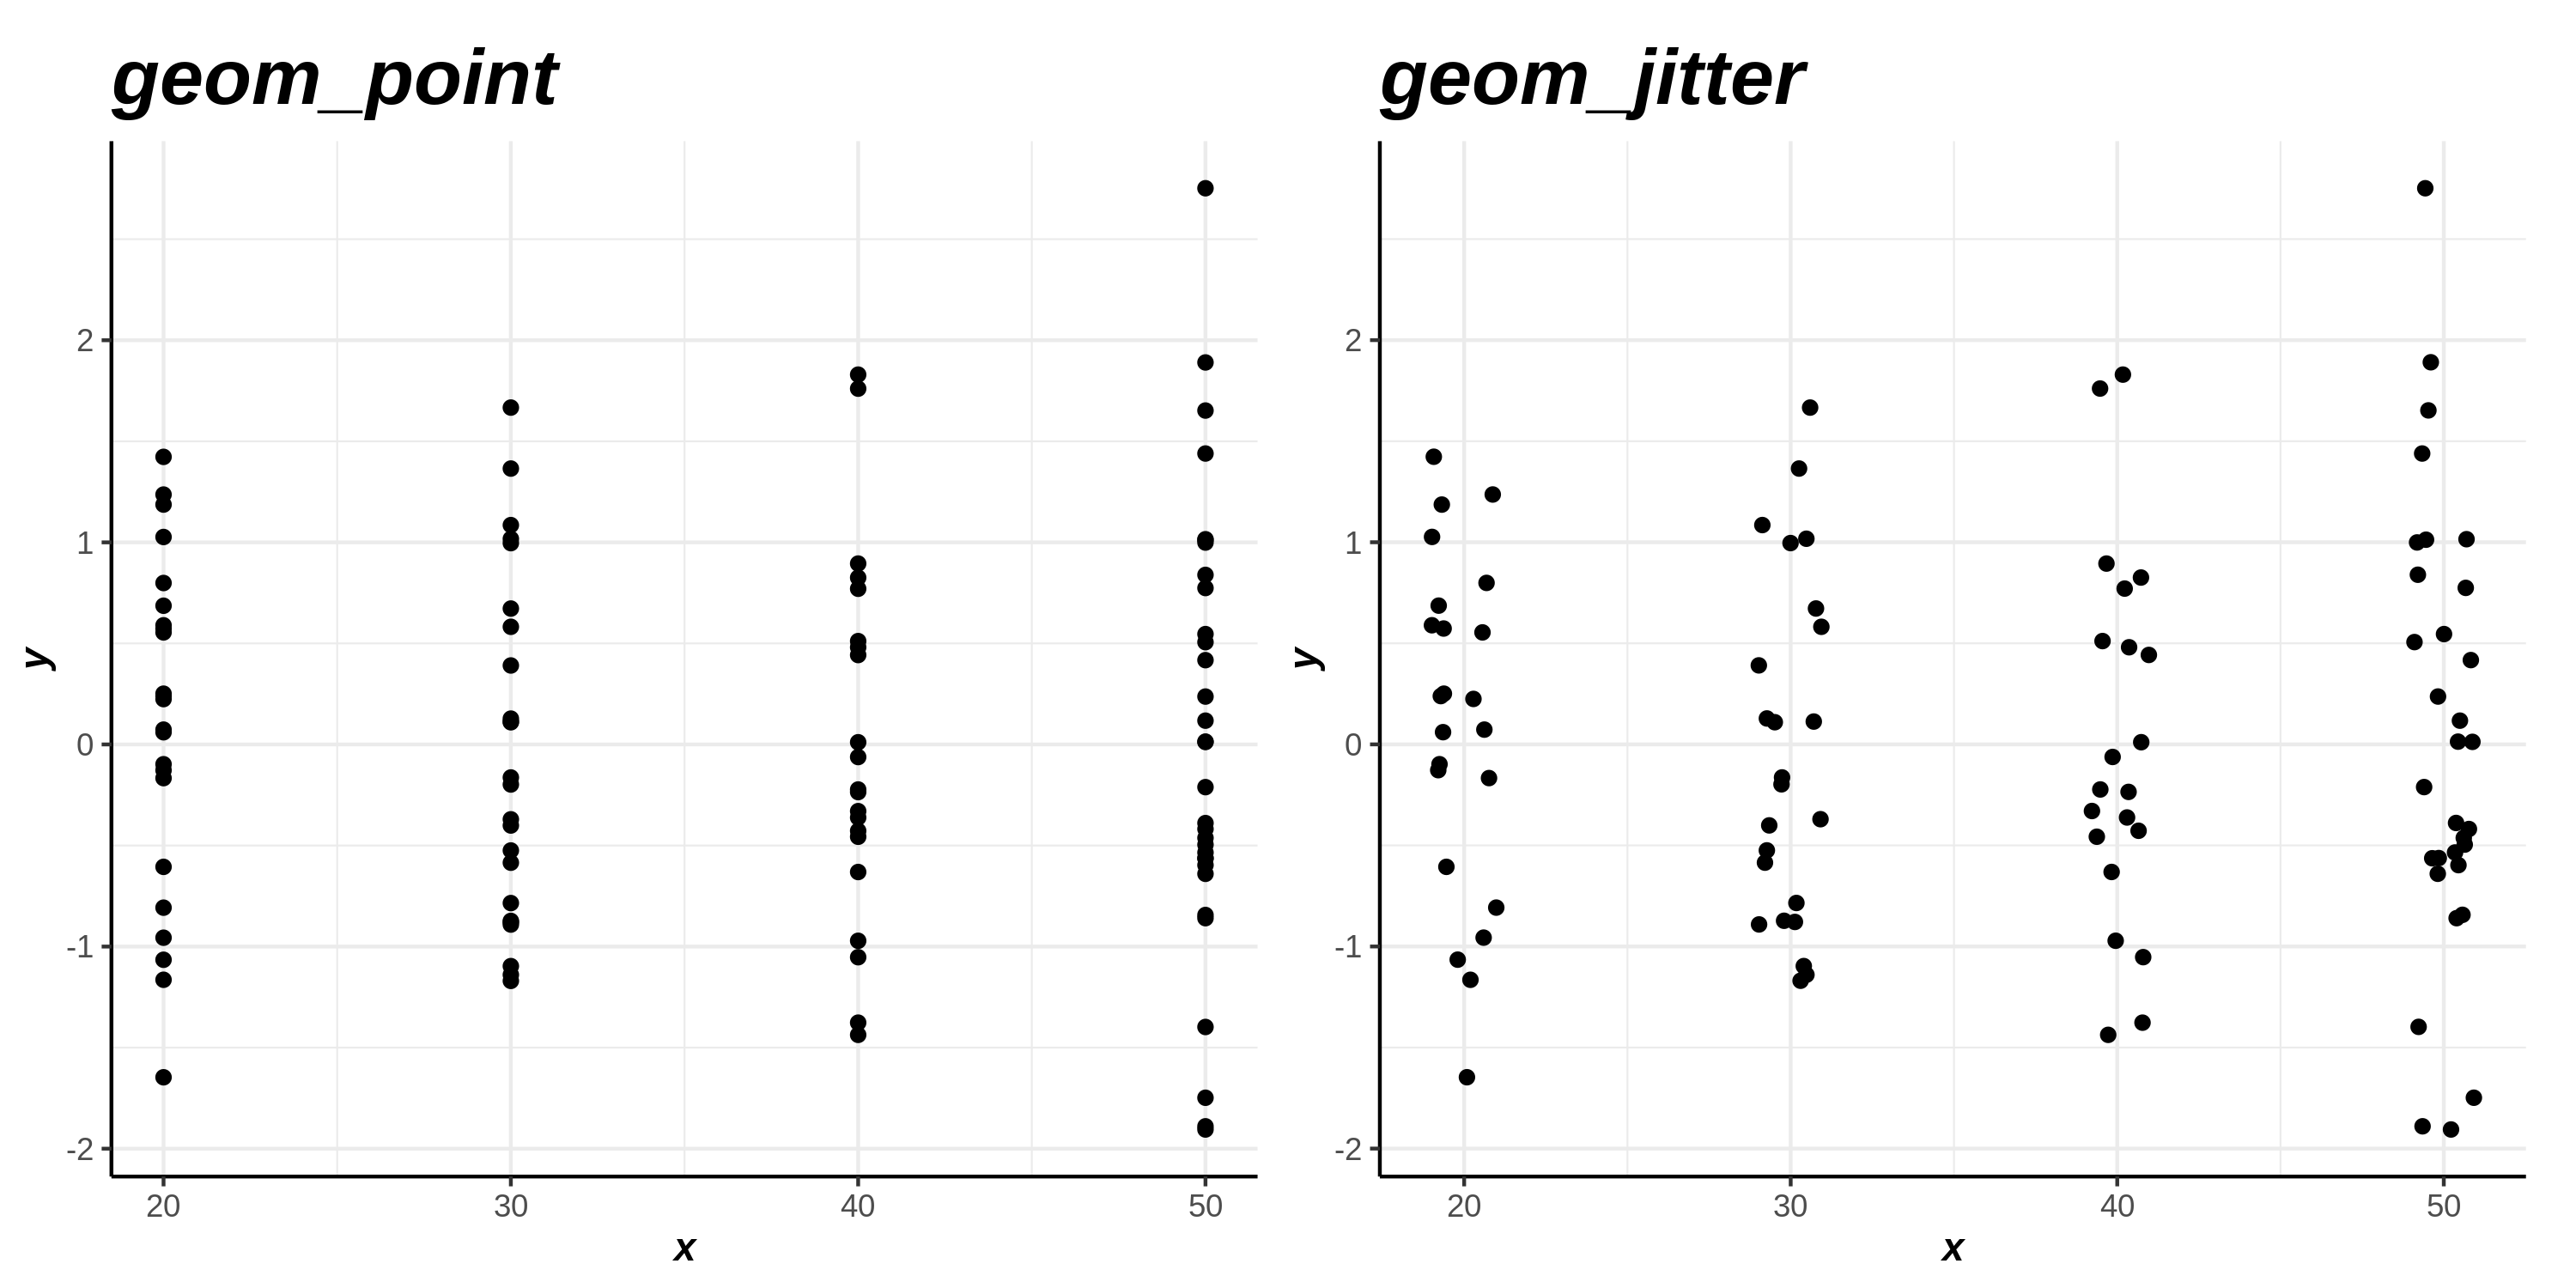

In [55]:
p1 = ggplot()+point(x,y)+ggtitle("geom_point")
p2 = ggplot()+jitter(x,y,width = 1) + ggtitle("geom_jitter")
figsize(10,5)
p1|p2
figsize()

# 1D geoms

## histogram

In [57]:
y1 = rnorm(1000)
y2 = rnorm(1000)*0.5 + 3 

`-` 예시1

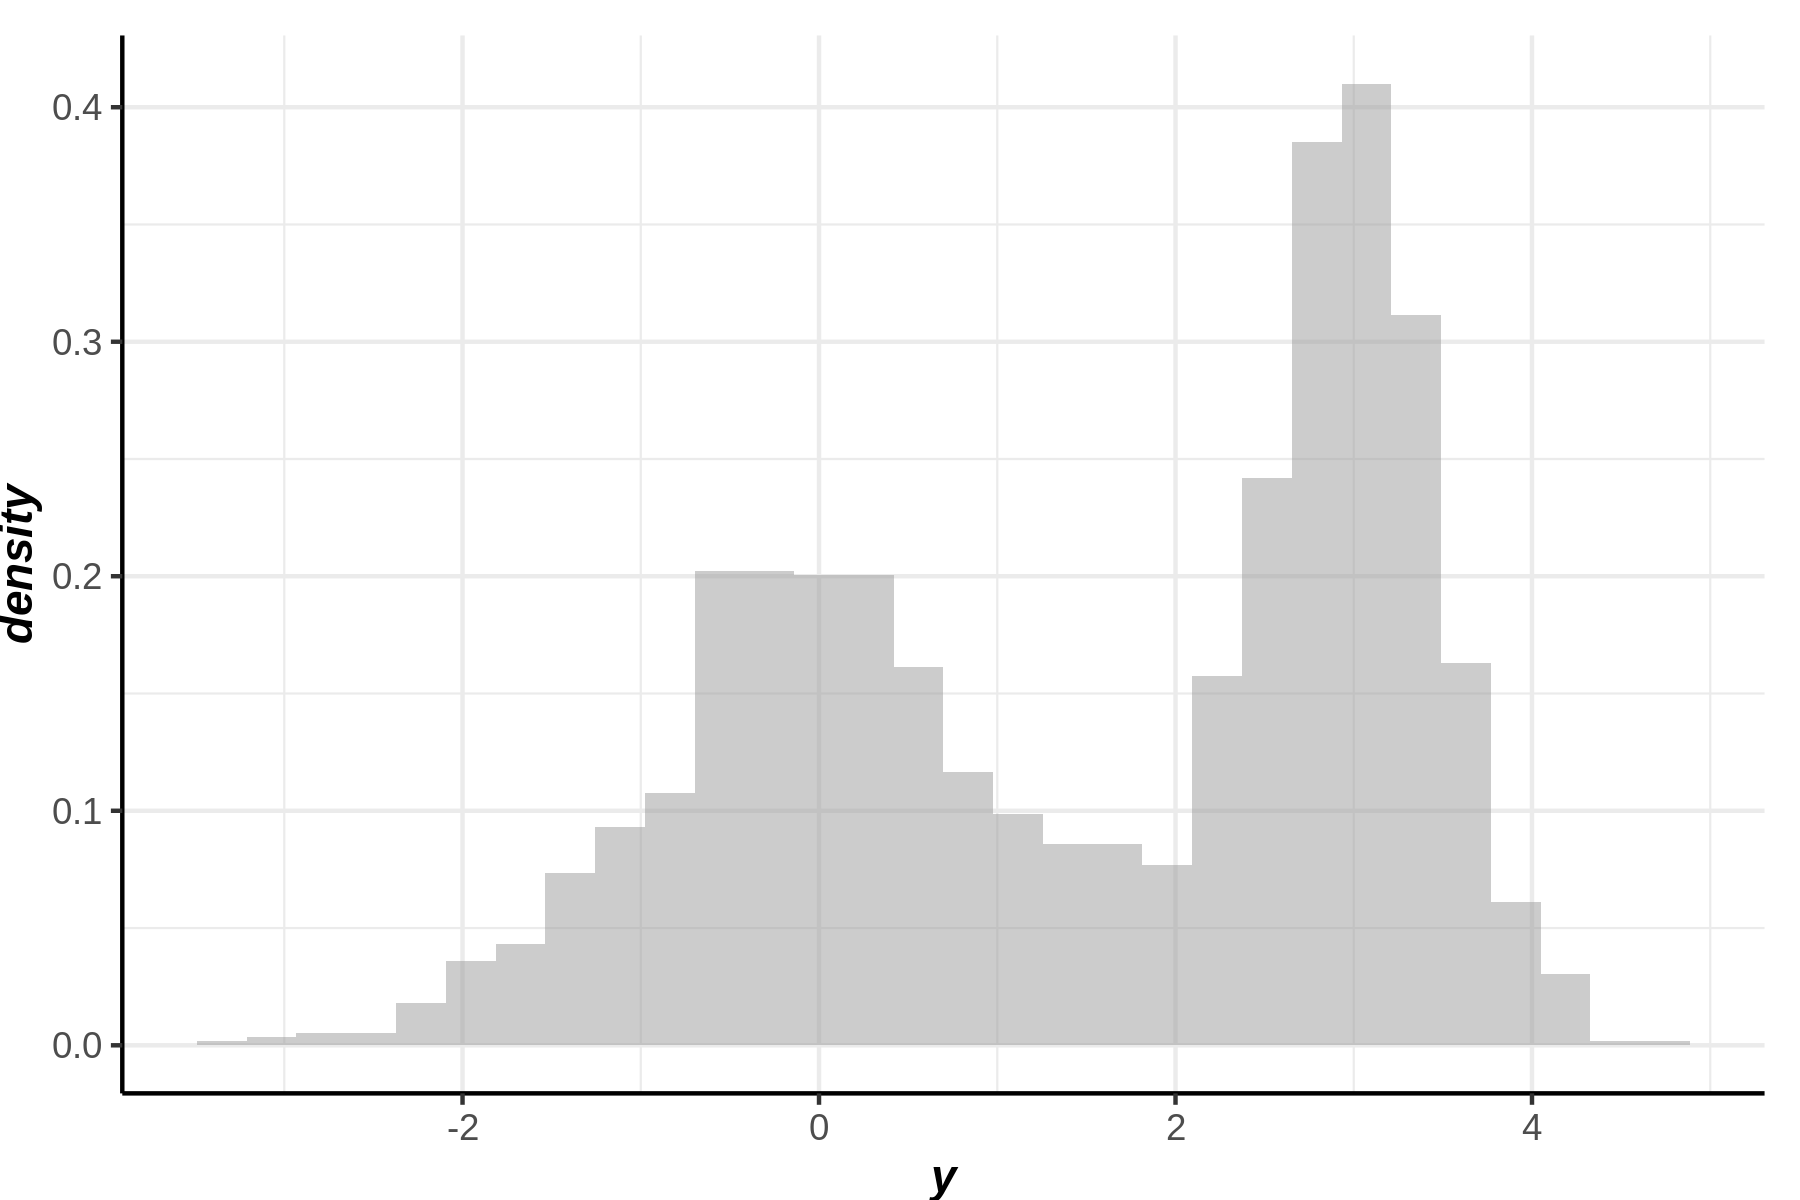

In [60]:
ggplot()+histogram(c(y1,y2),fill="gray60")

`-` 예시2

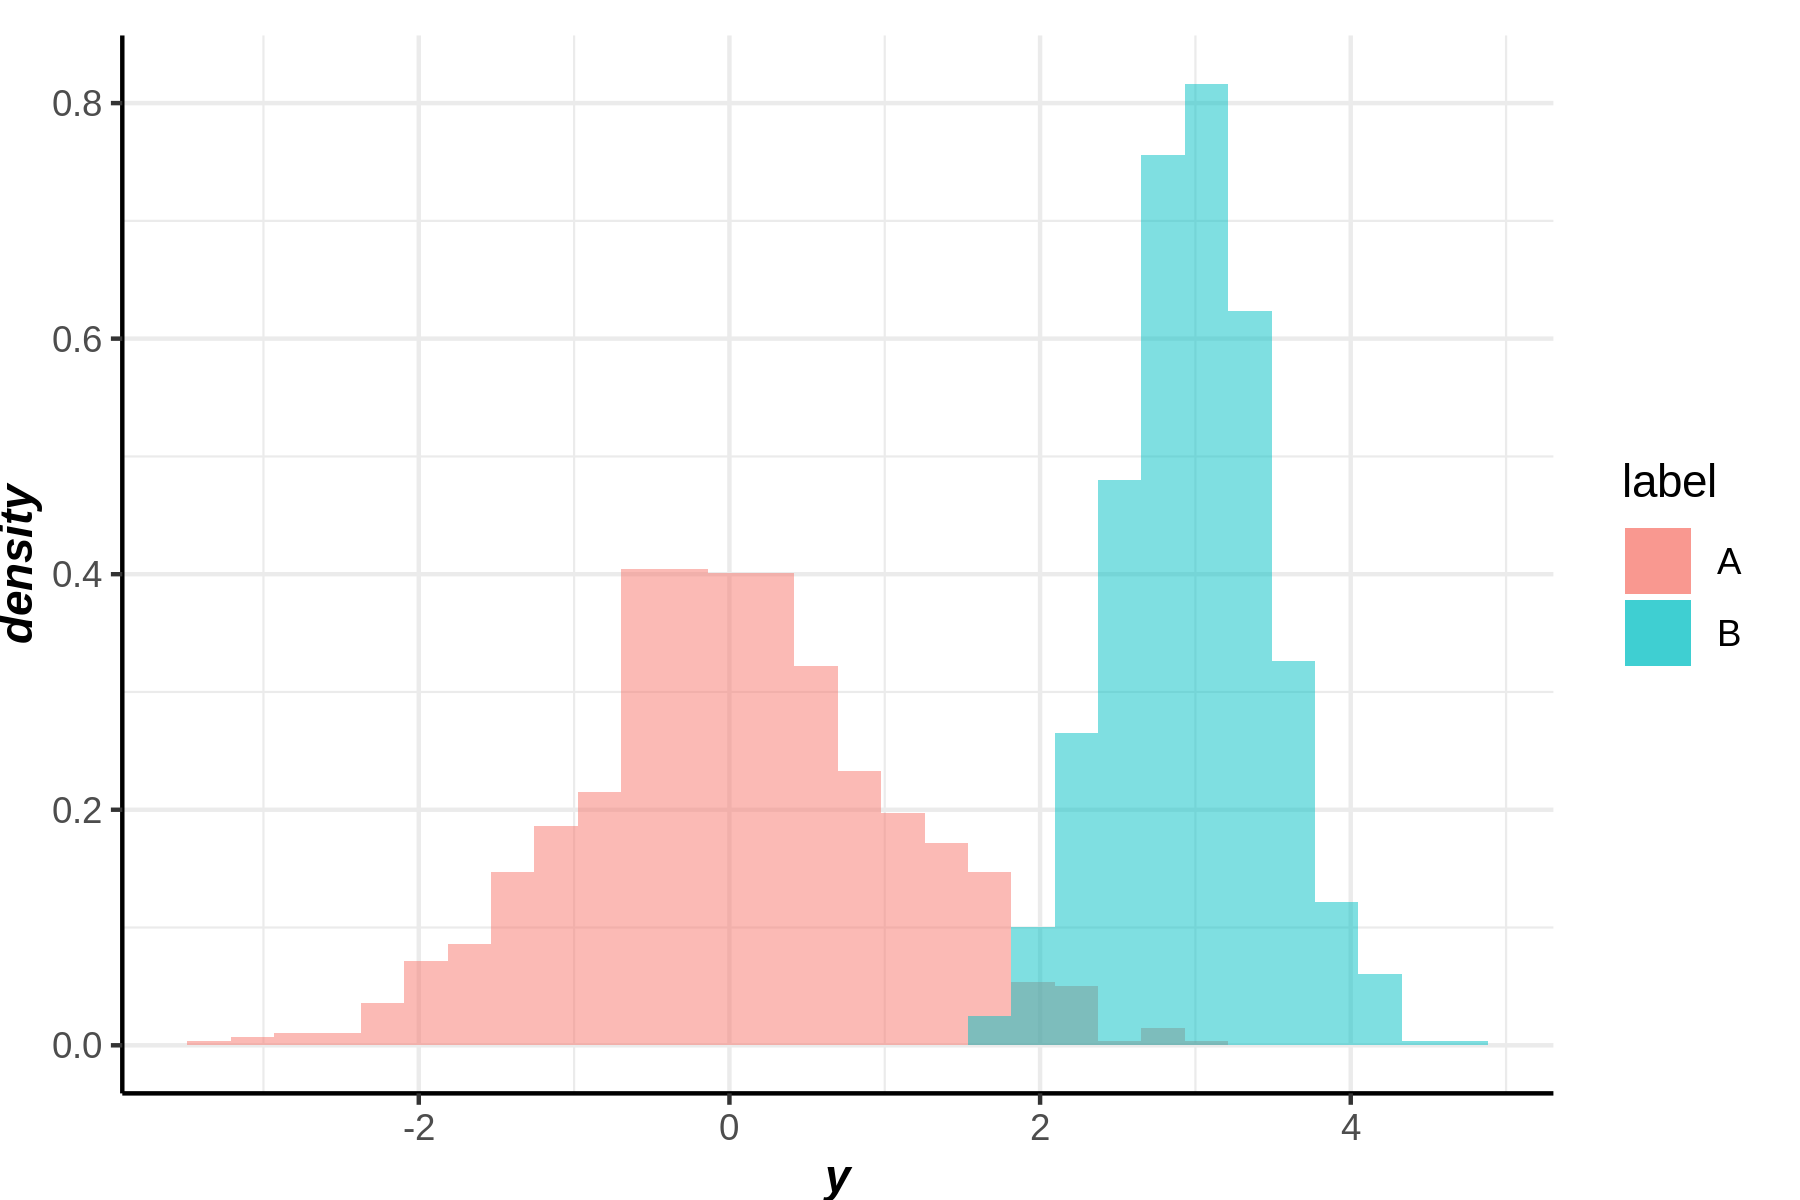

In [61]:
ggplot()+histogram(y1,label="A")+histogram(y2,label="B")

`-` 예시3

In [62]:
ggplot()+histogram(cbind(y1,y2))

## density

In [63]:
y1 = rnorm(1000)
y2 = rnorm(1000)*0.5 + 3 

`-` 예시1

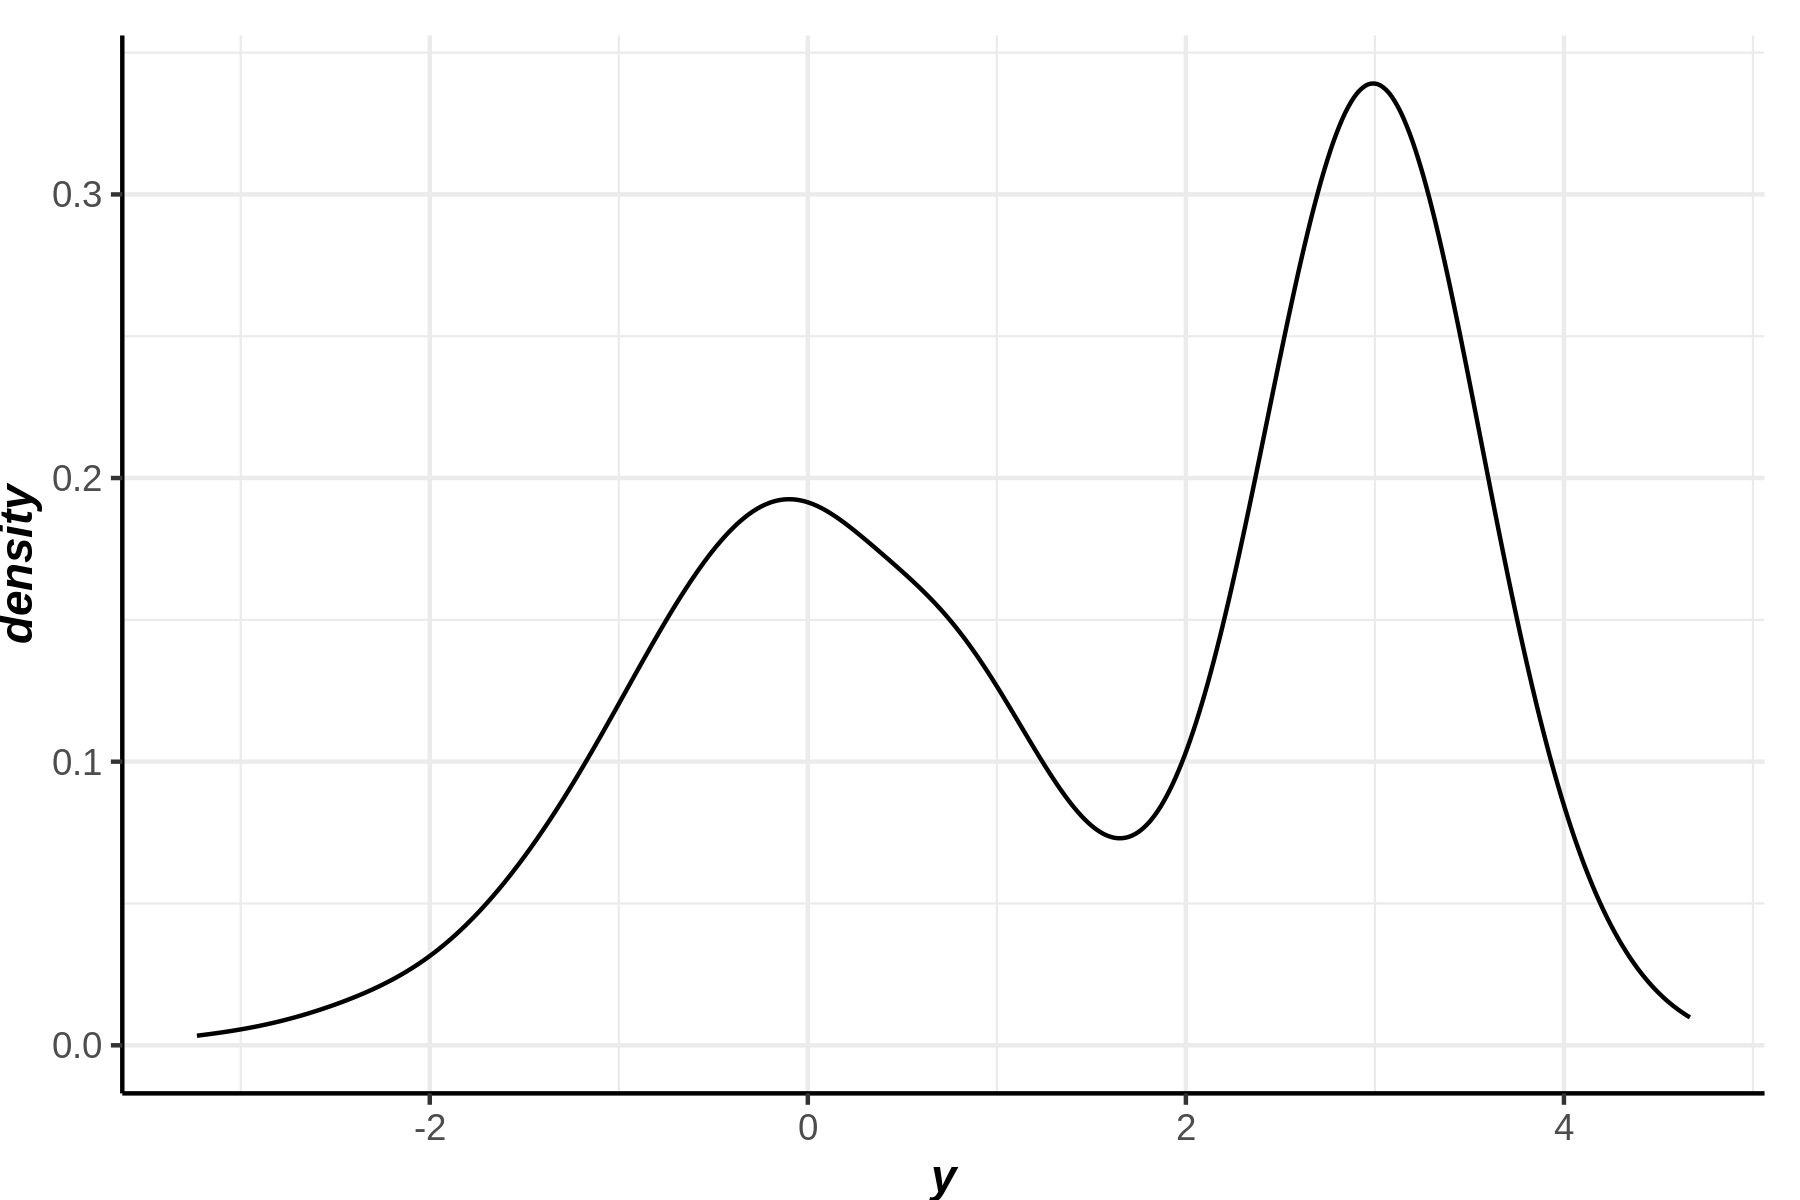

In [64]:
ggplot()+density(c(y1,y2))

`-` 예시2

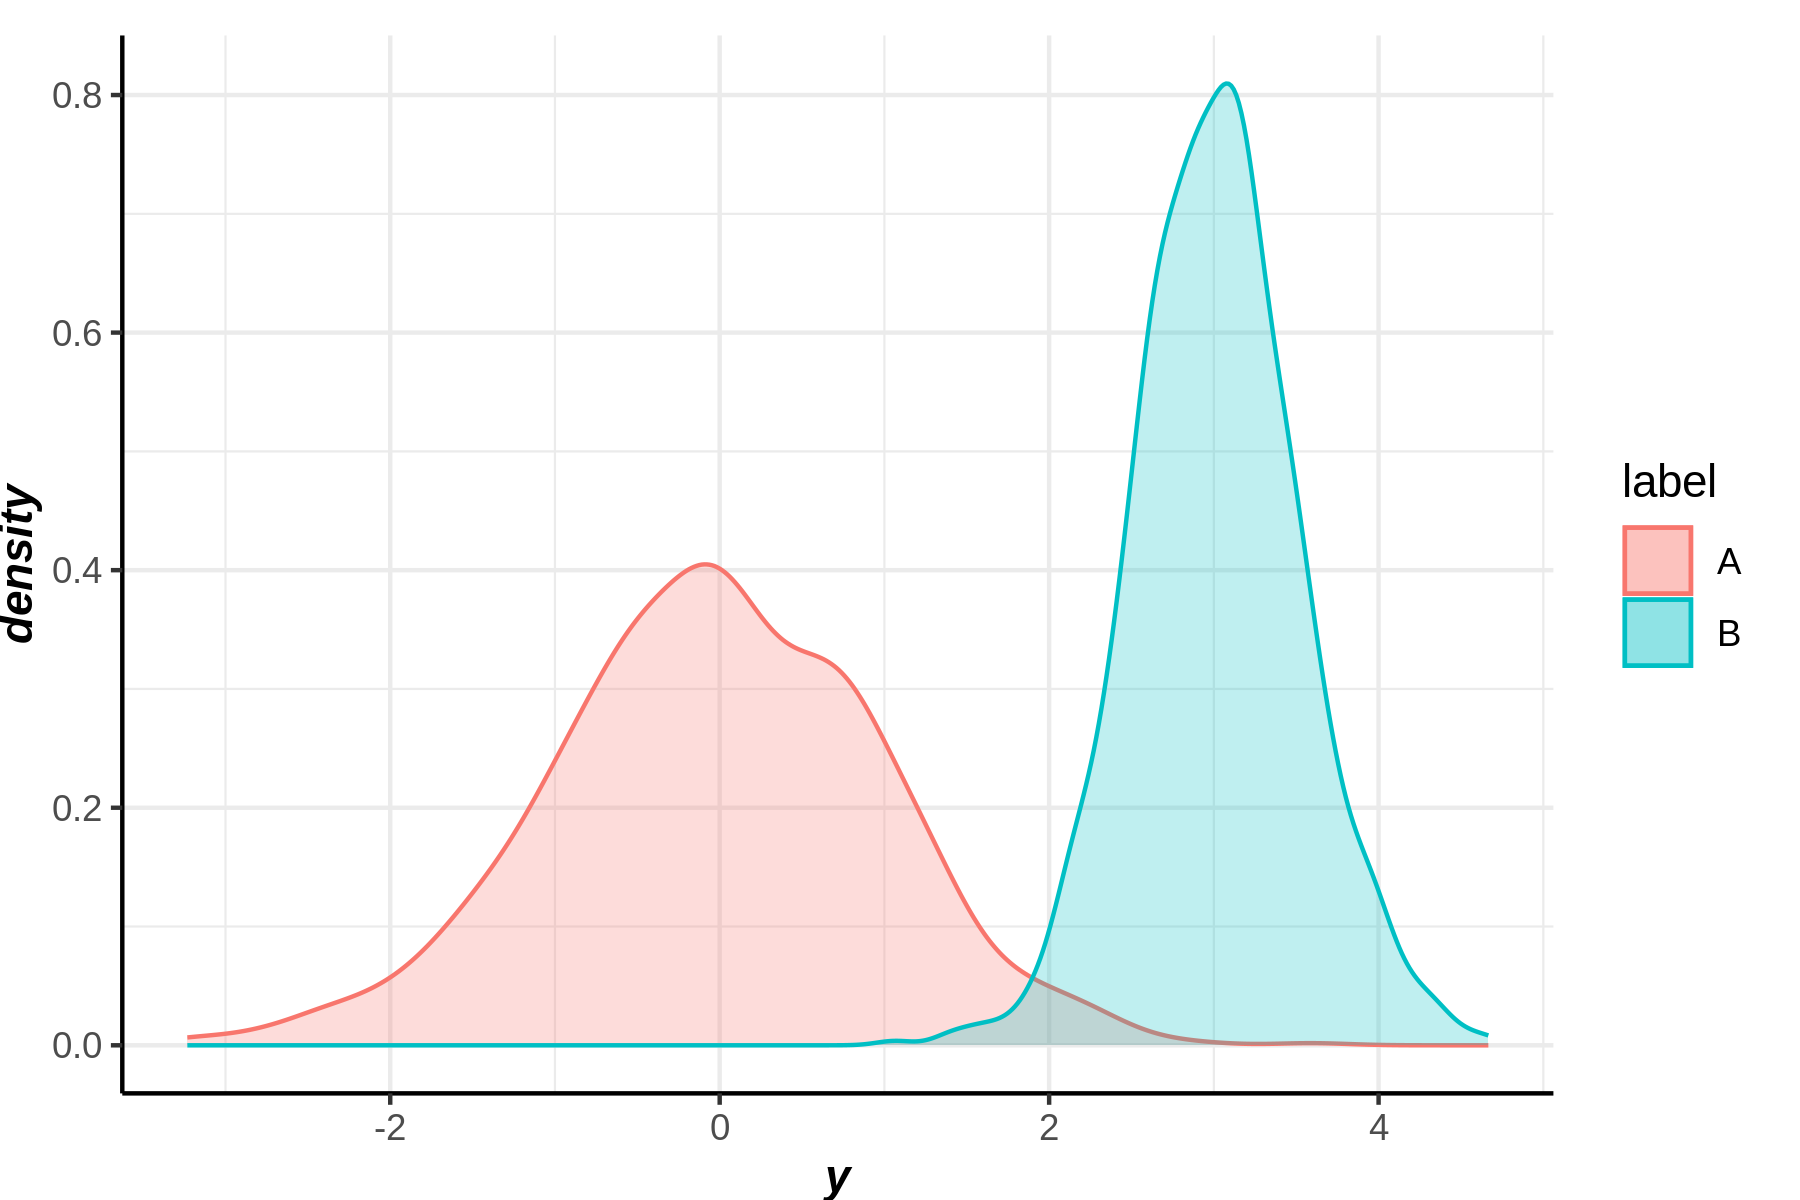

In [65]:
ggplot()+density(y1,label="A")+density(y2,label="B")

`-` 예시3

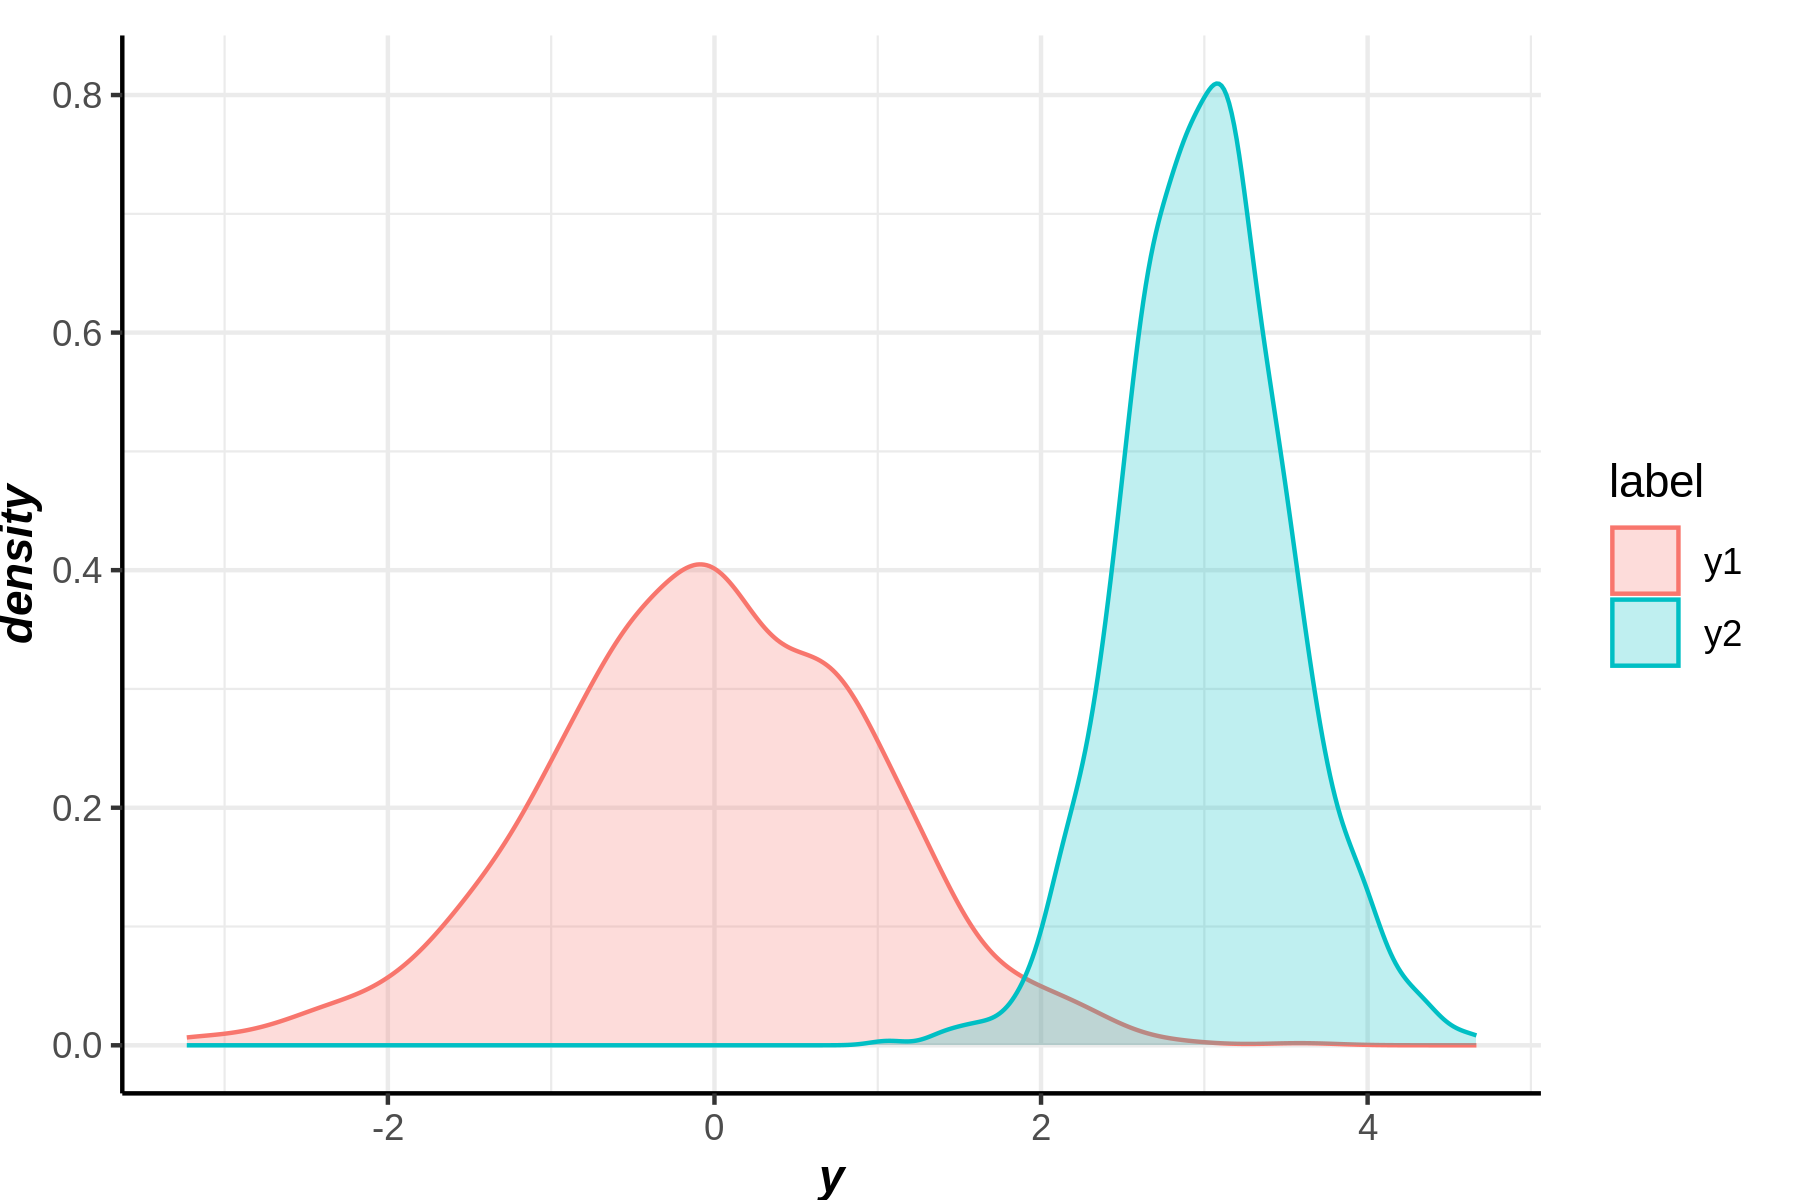

In [66]:
ggplot()+density(cbind(y1,y2))

`-` 예시4

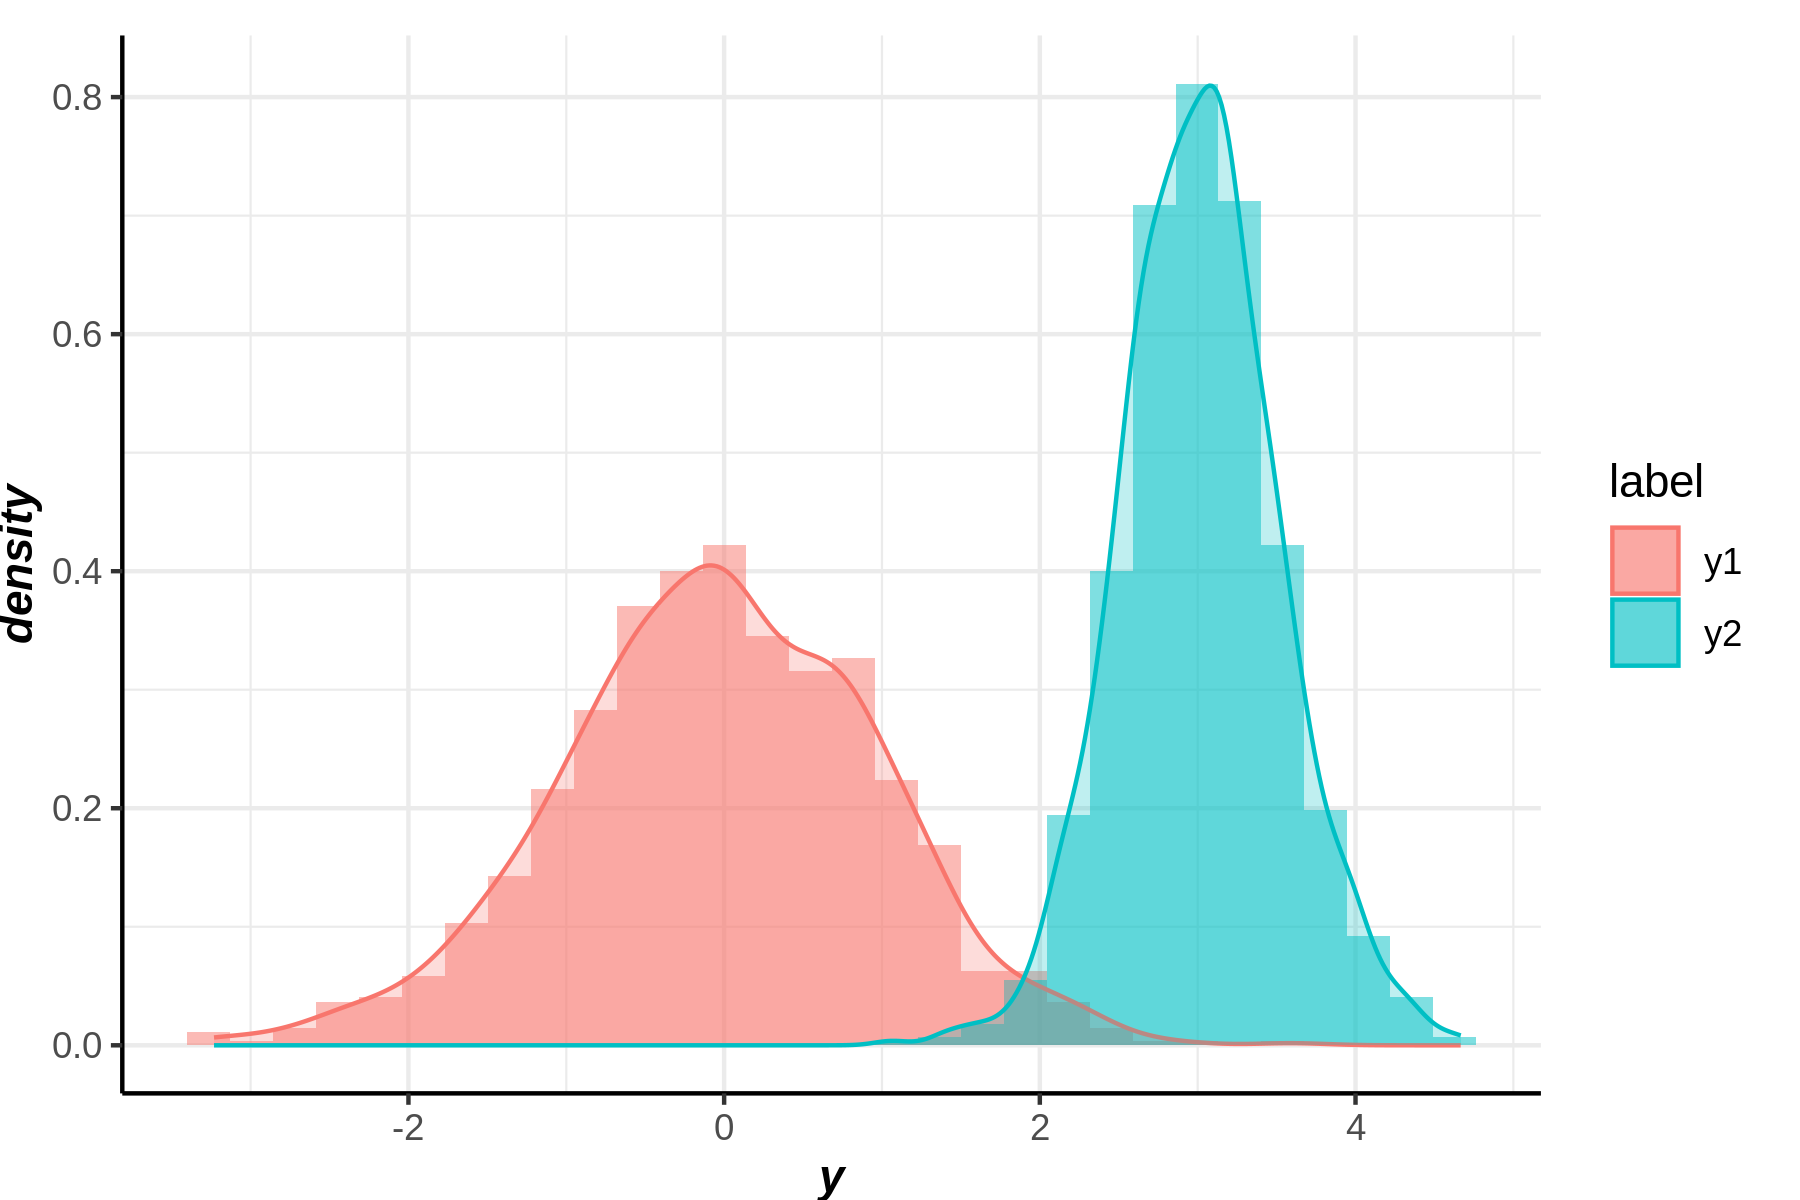

In [67]:
ggplot()+histogram(cbind(y1,y2))+density(cbind(y1,y2))

## qq

In [68]:
y1 = rnorm(100)
y2 = rchisq(100,df=5)

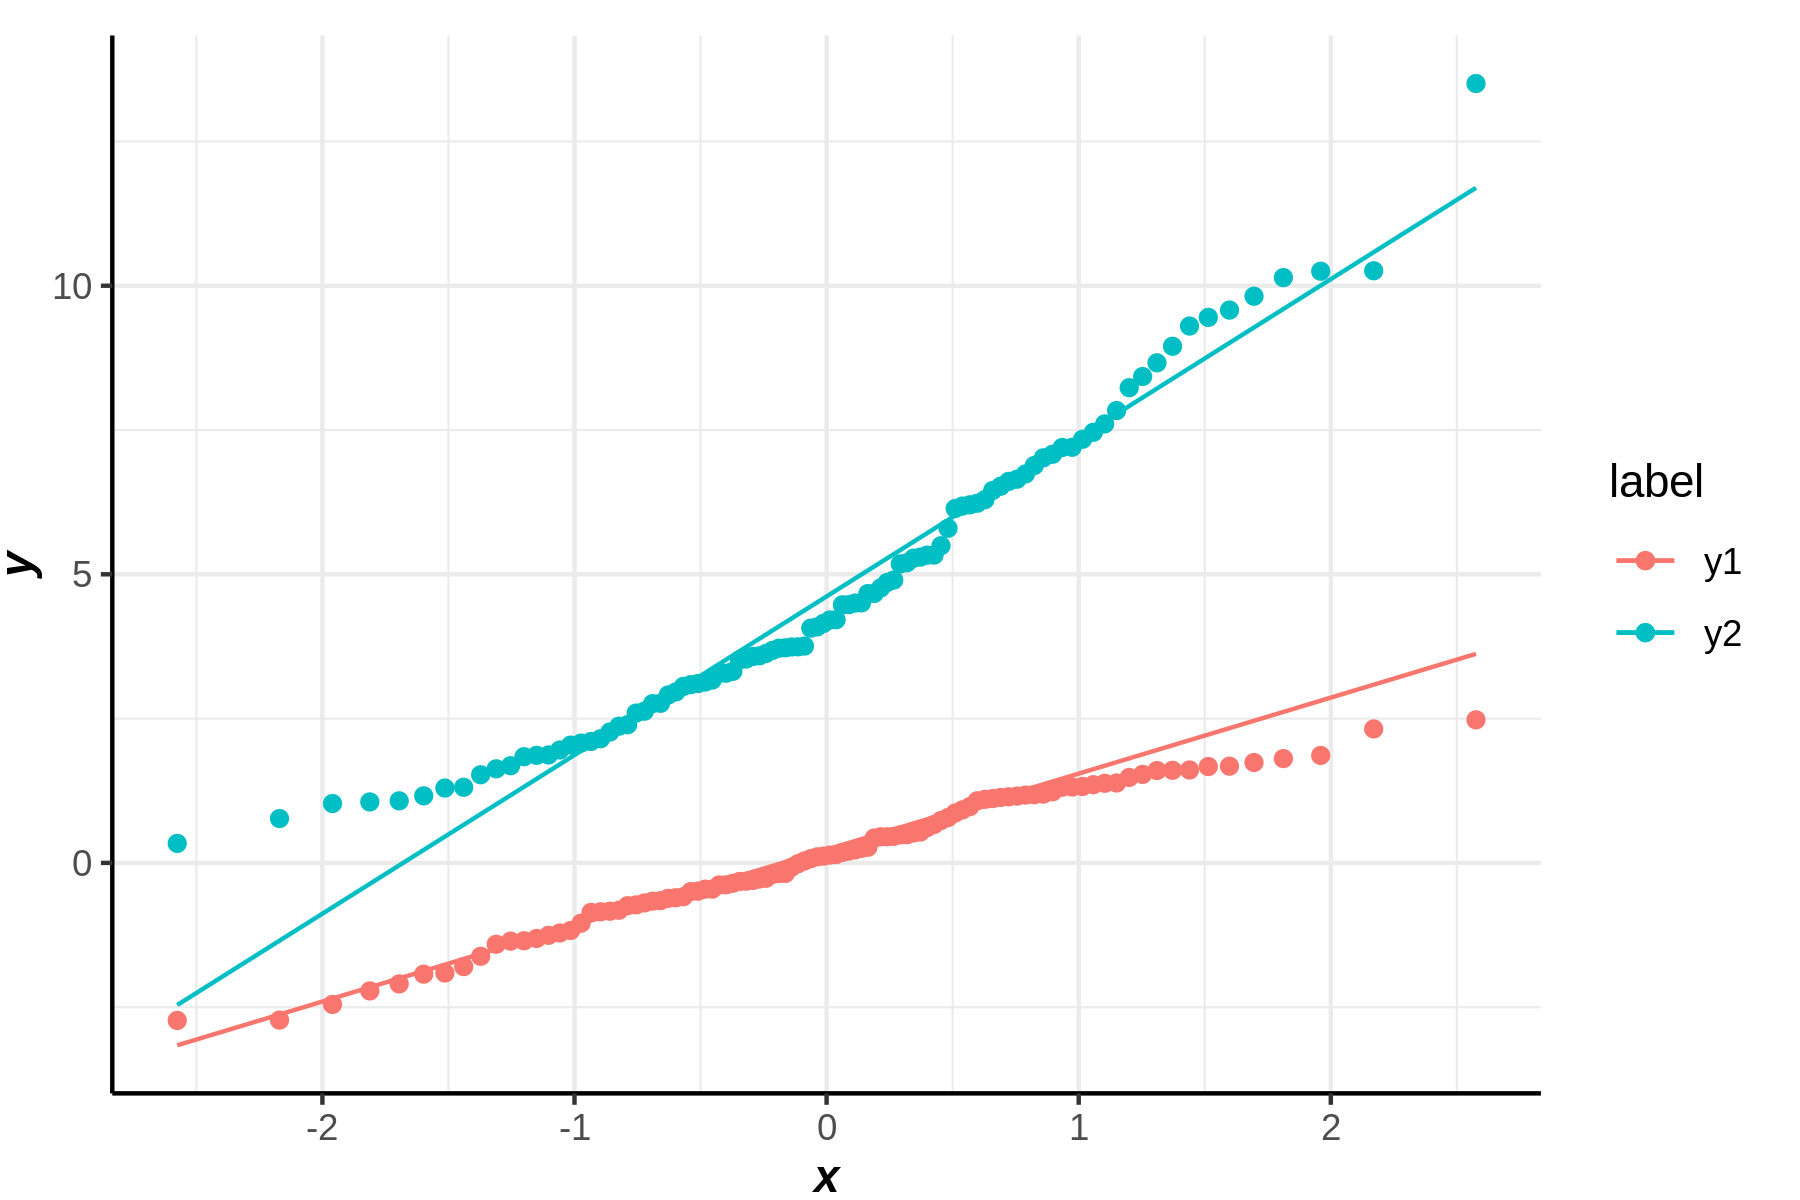

In [69]:
ggplot()+
qq(y1,label='y1')+qq_line(y1,label='y1')+
qq(y2,label='y2')+qq_line(y2,label='y2')

# geoms for comparison

## col

In [70]:
y1=c(1,2,3,5)
y2=c(1,4,2,1)

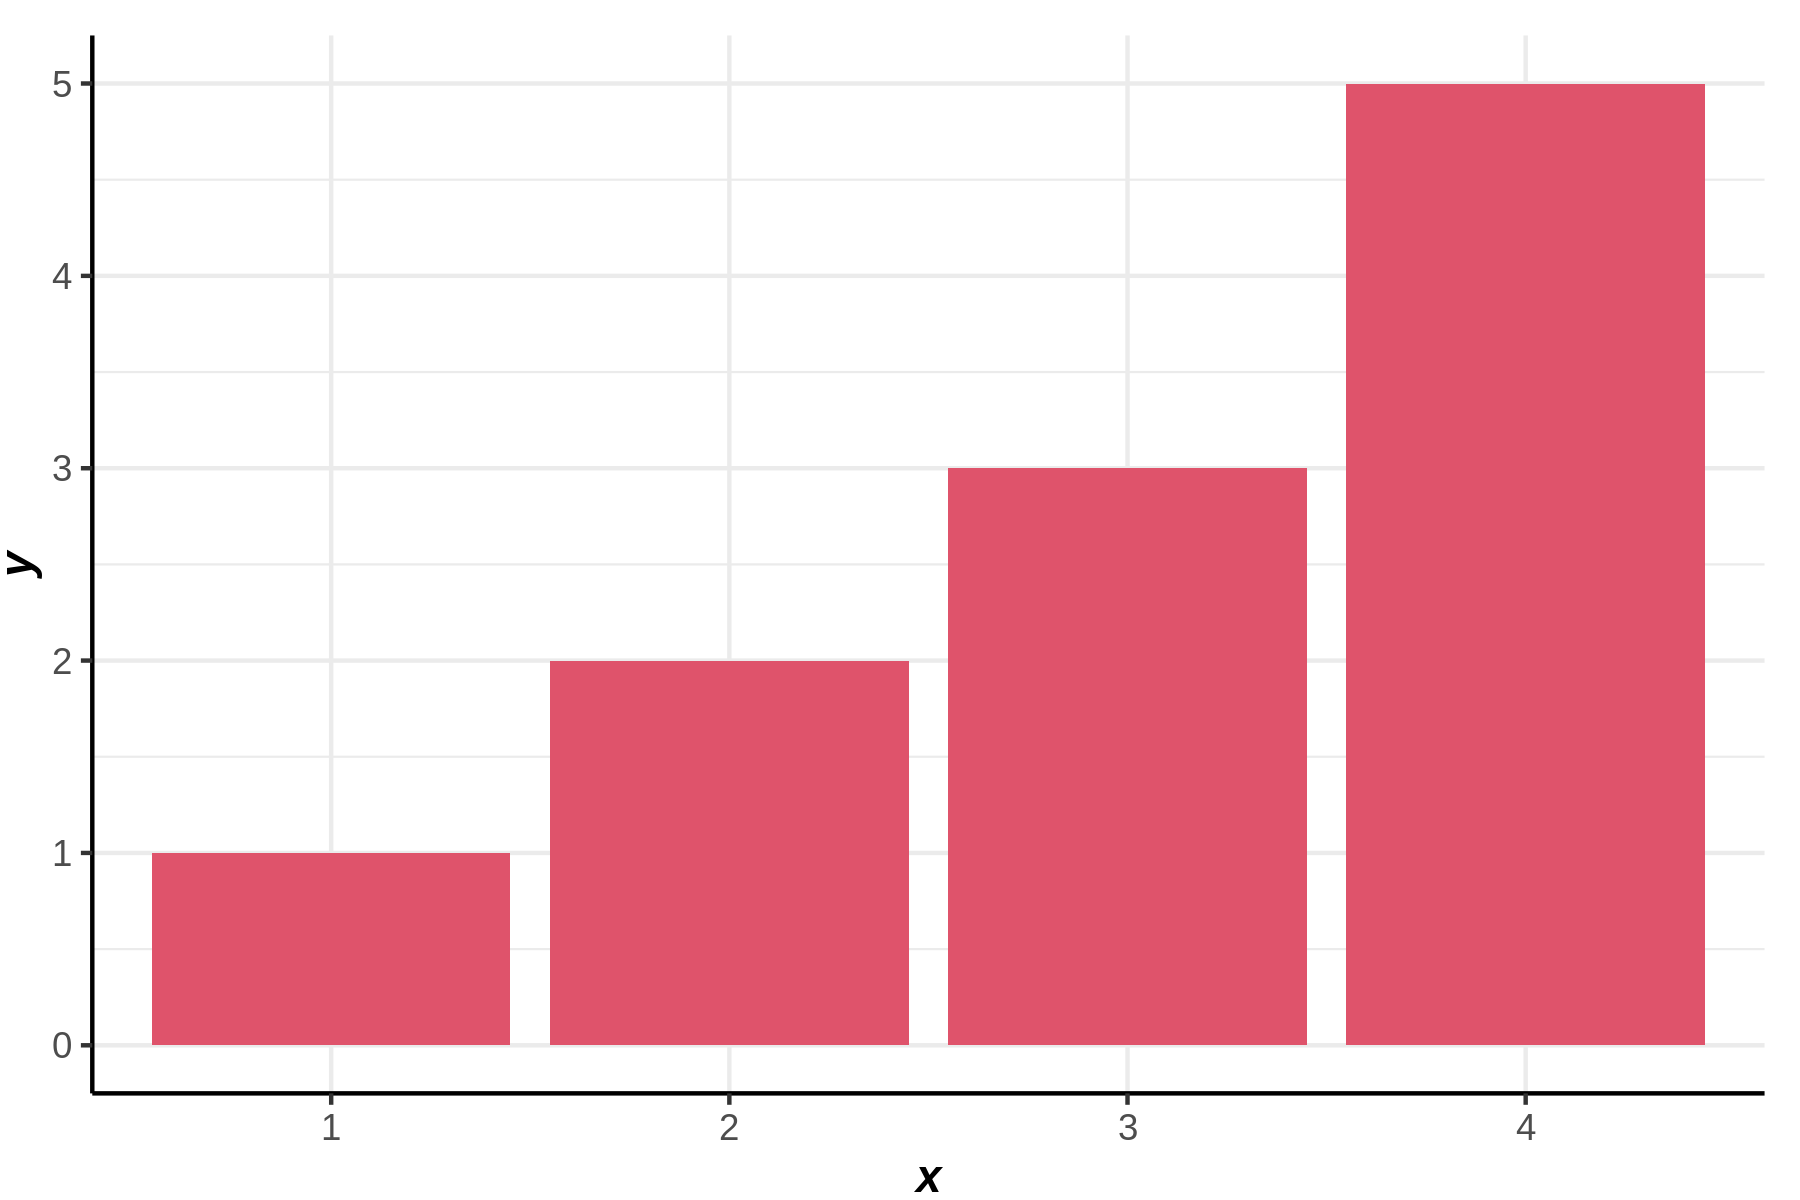

In [71]:
ggplot()+col(y1,fill=2)

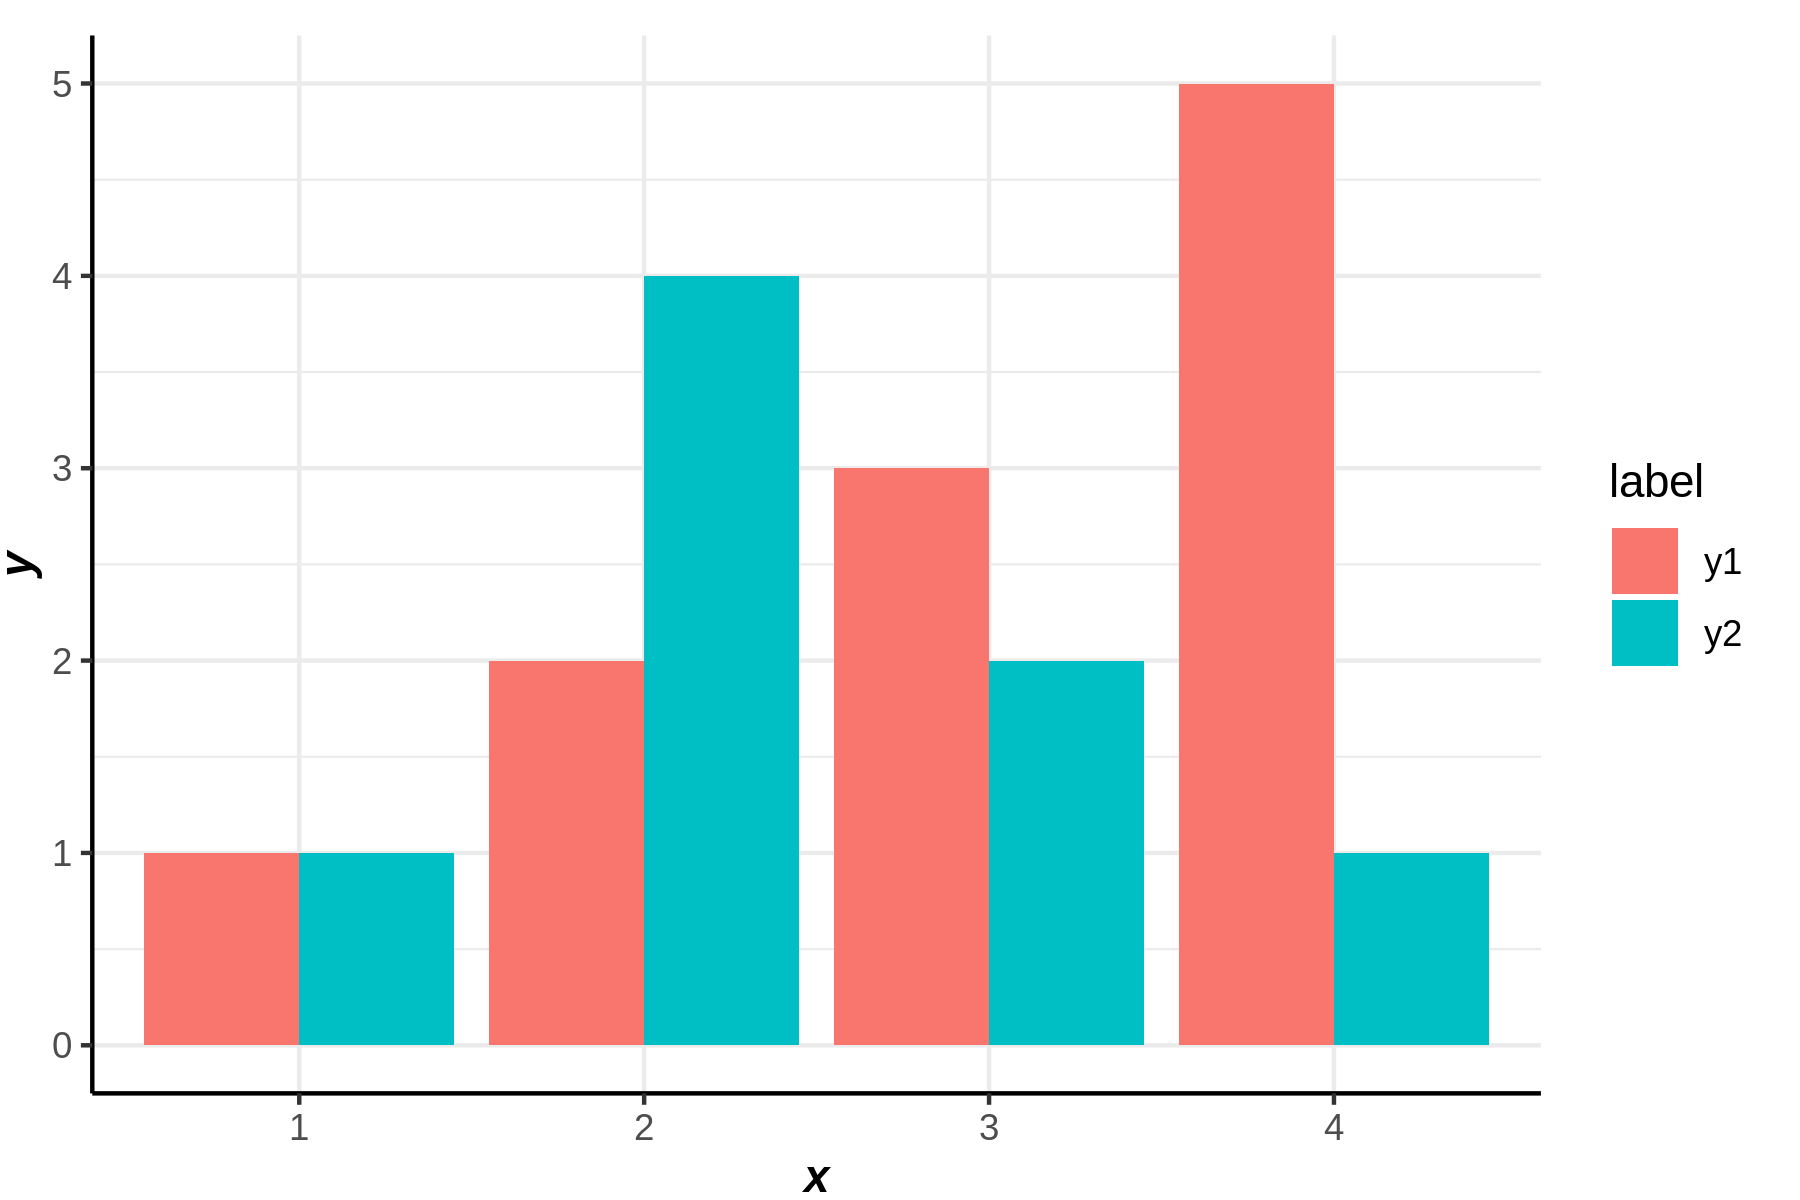

In [72]:
ggplot()+col(cbind(y1,y2))

## boxplot

In [73]:
y1=rnorm(100)
y2=rnorm(100)+3

`-` 예시1

In [74]:
ggplot()+boxplot(y1)

`-` 예시2

In [79]:
ggplot()+boxplot(cbind(y1,y2))

`-` 예시3

In [97]:
ggplot()+boxplot(x='A',y1,label='A')+boxplot(x='B',y2,label='B')

## violin

In [81]:
y1=rnorm(100)
y2=rnorm(100)+3

`-` 예시1

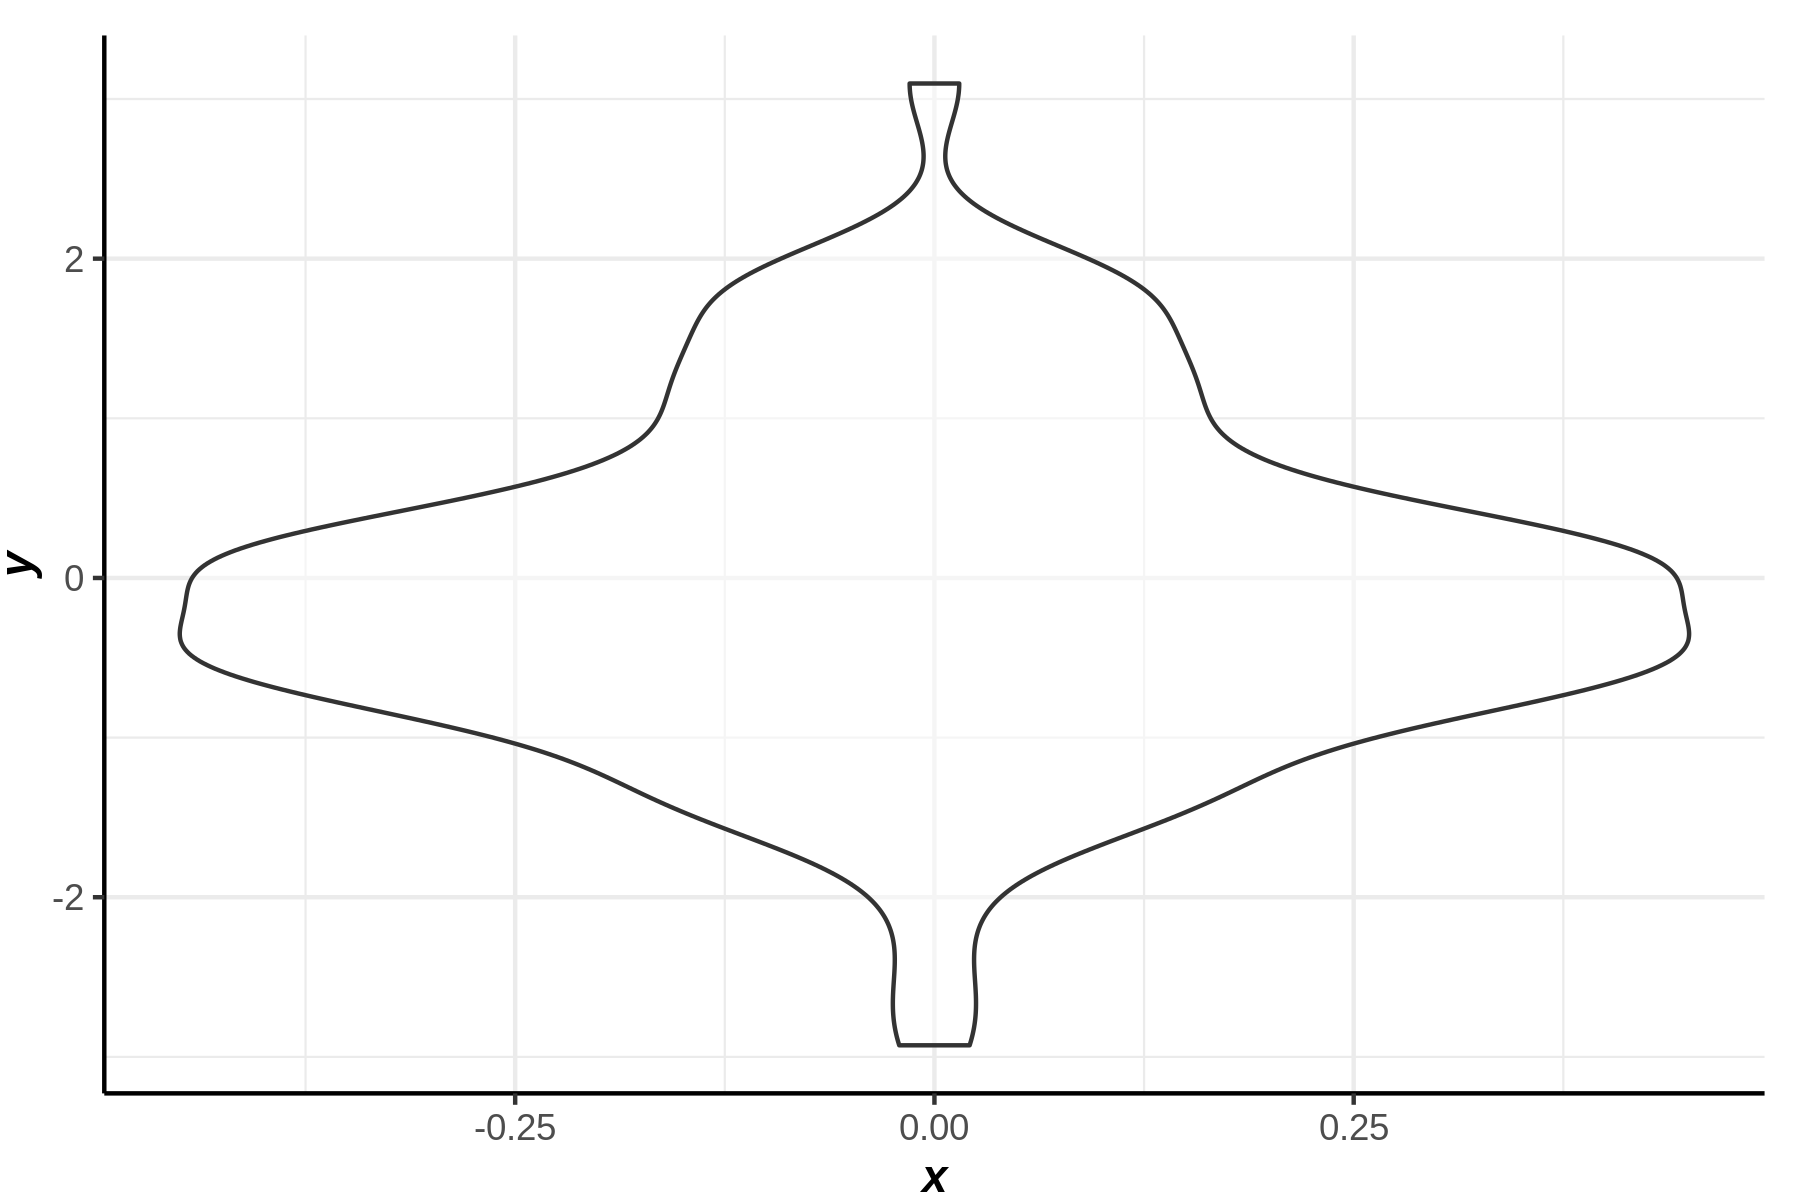

In [82]:
ggplot()+violin(y1)

`-` 예시2

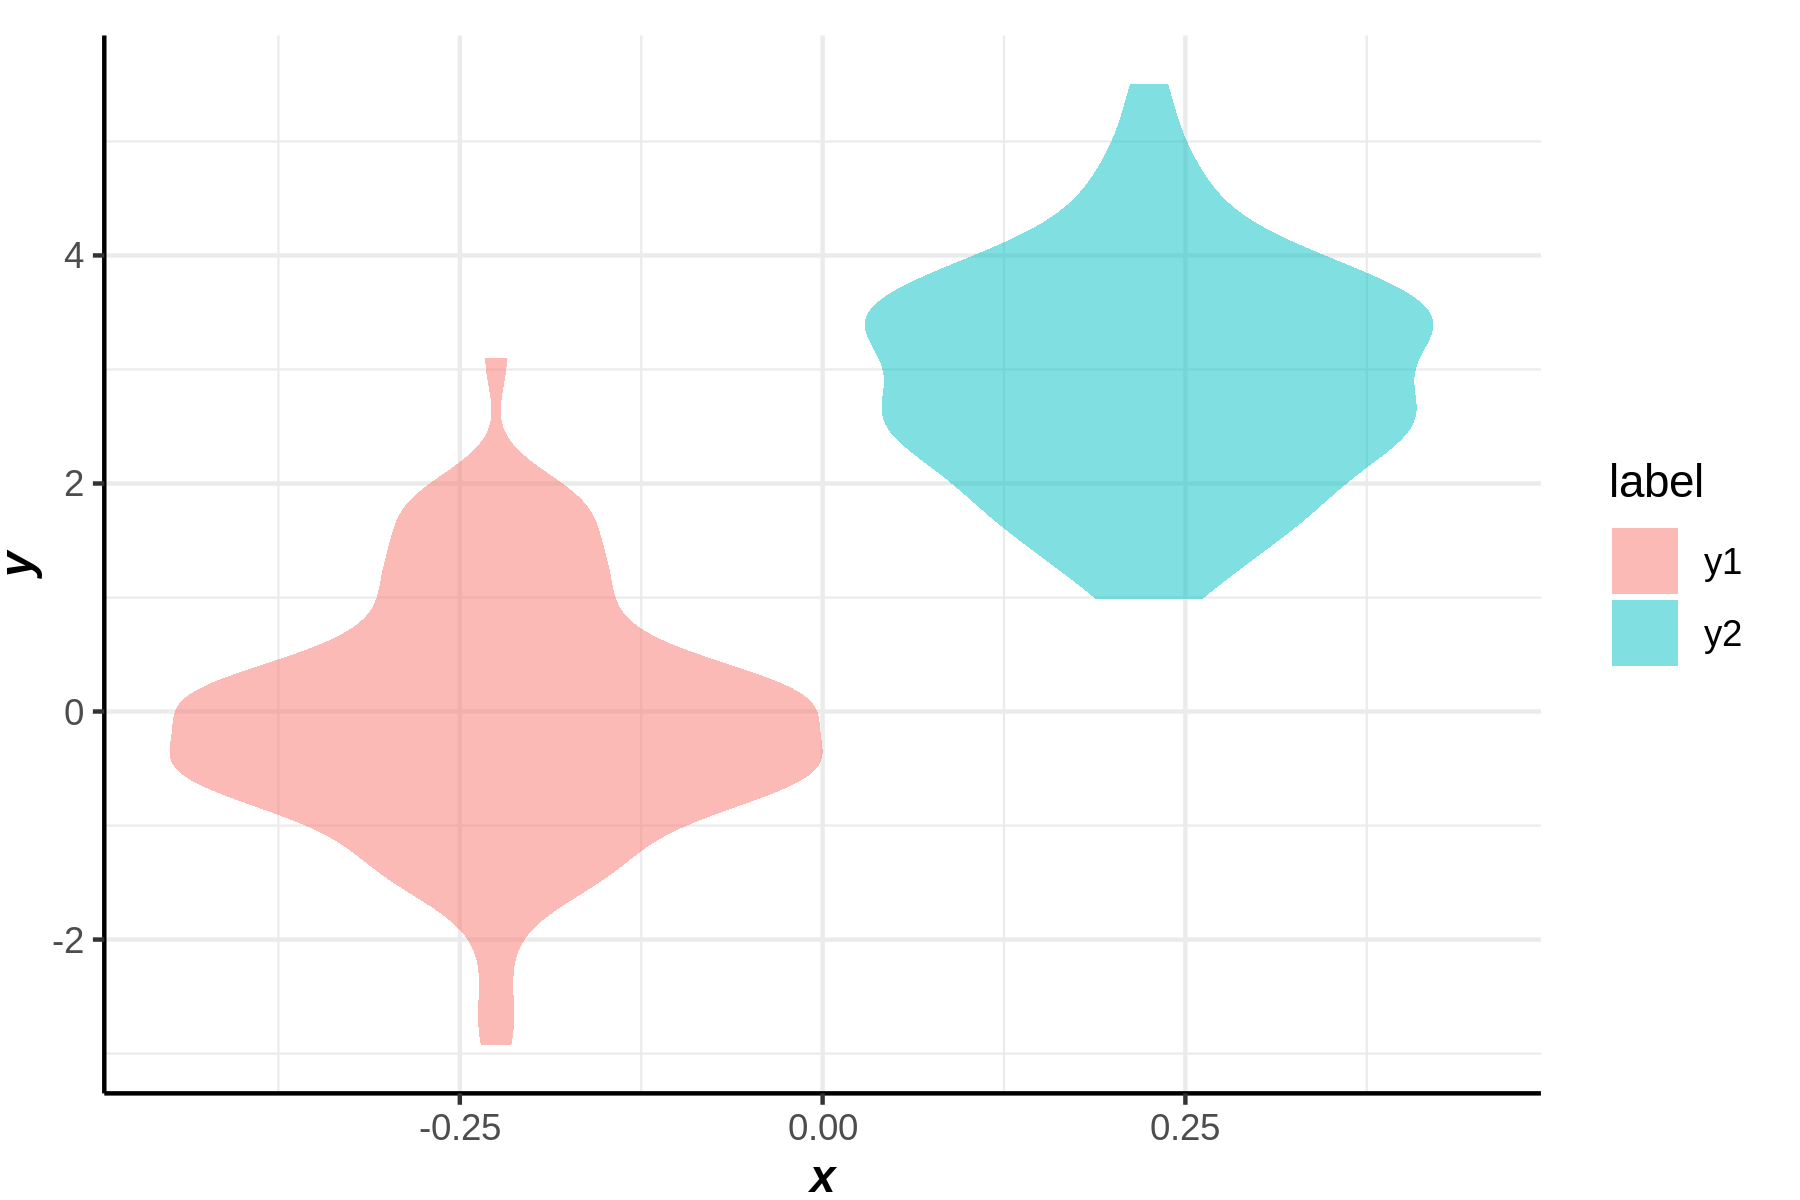

In [83]:
ggplot()+violin(cbind(y1,y2), color = "transparent")

`-` 예시3

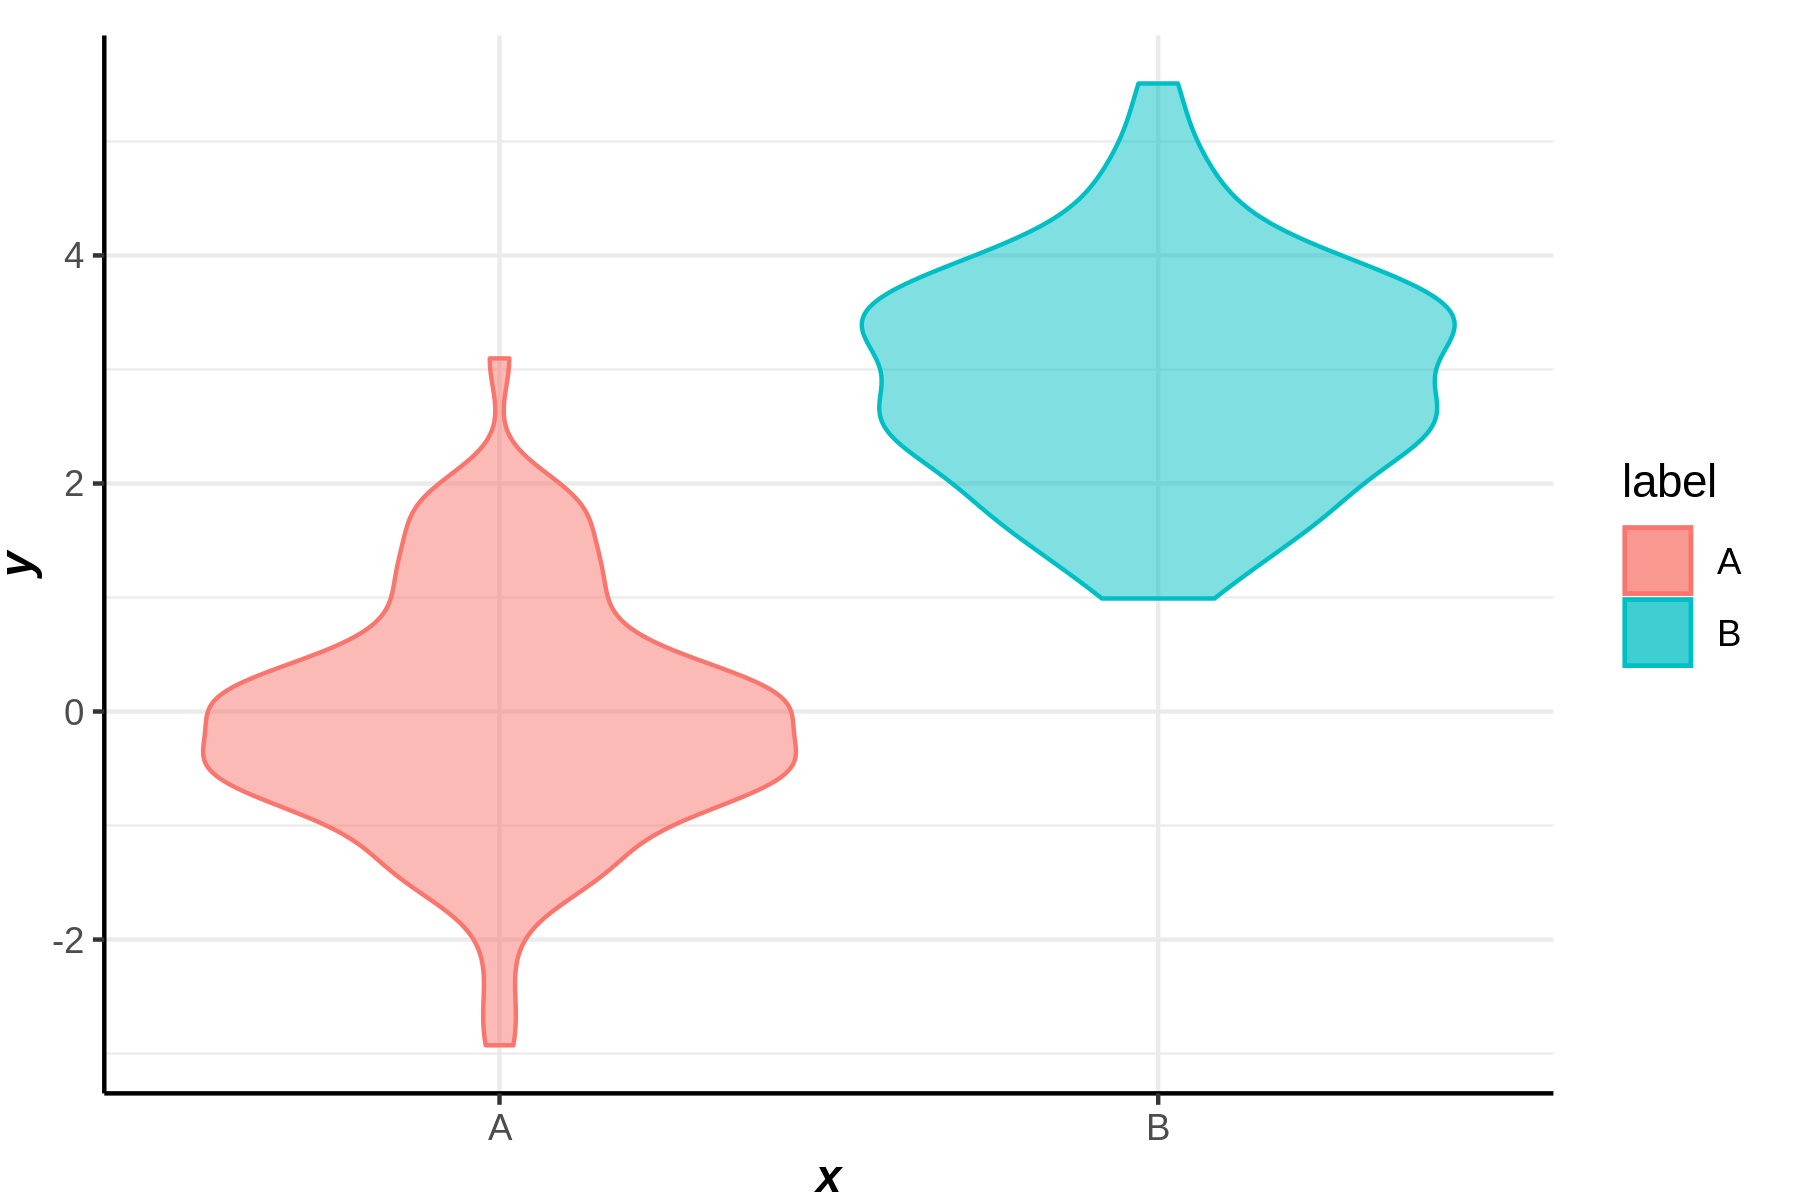

In [84]:
ggplot()+violin(x='A',y1,label='A')+violin(x='B',y2,label='B')